# Child Care Initial Dive

An initial exploration of child care data in Austin

In [2]:
import os
import pandas as pd

childcare = pd.read_csv("../data/child2023q4.csv")

childcare.head()

ZIPCode Reporting_Date ChildEthnicityHispLatino ChildRaceAmIndAlaNat  \
0    75008     10/01/2023                        *                    *   
1    75008     11/01/2023                        *                    *   
2    75008     12/01/2023                        *                    *   
3    76544     10/01/2023                       22                    *   
4    76544     11/01/2023                       21                    *   

  ChildRaceAsian ChildRaceBlackAfriAmer ChildRaceHawaiiPacific ChildRaceWhite  \
0              *                      *                      *              *   
1              *                      *                      *              *   
2              *                      *                      *              *   
3              *                     45                      *             33   
4              *                     43                      *             35   

  ChildRaceMult ChildMale ChildFemale ChildDisability ChildAgeInfantToddler  \
0             *         *           *               *                     *   
1             *         *           *               *                     *   
2             *         *           *               *                     *   
3            13        46          52               5                    45   
4            15        47          53               5                    47   

  ChildAgePrek ChildAgeSchAge  
0            *              *  
1            *              *  
2            *              *  
3           31             22  
4           31             22

In [3]:
childcare.shape

(5054, 15)

In [4]:
# reset index 
childcare["Reporting_Date"] = pd.to_datetime(childcare["Reporting_Date"])

childcare.set_index("Reporting_Date", inplace=True)

childcare.head()

ZIPCode ChildEthnicityHispLatino ChildRaceAmIndAlaNat  \
Reporting_Date                                                          
2023-10-01        75008                        *                    *   
2023-11-01        75008                        *                    *   
2023-12-01        75008                        *                    *   
2023-10-01        76544                       22                    *   
2023-11-01        76544                       21                    *   

               ChildRaceAsian ChildRaceBlackAfriAmer ChildRaceHawaiiPacific  \
Reporting_Date                                                                
2023-10-01                  *                      *                      *   
2023-11-01                  *                      *                      *   
2023-12-01                  *                      *                      *   
2023-10-01                  *                     45                      *   
2023-11-01                  *                     43                      *   

               ChildRaceWhite ChildRaceMult ChildMale ChildFemale  \
Reporting_Date                                                      
2023-10-01                  *             *         *           *   
2023-11-01                  *             *         *           *   
2023-12-01                  *             *         *           *   
2023-10-01                 33            13        46          52   
2023-11-01                 35            15        47          53   

               ChildDisability ChildAgeInfantToddler ChildAgePrek  \
Reporting_Date                                                      
2023-10-01                   *                     *            *   
2023-11-01                   *                     *            *   
2023-12-01                   *                     *            *   
2023-10-01                   5                    45           31   
2023-11-01                   5                    47           31   

               ChildAgeSchAge  
Reporting_Date                 
2023-10-01                  *  
2023-11-01                  *  
2023-12-01                  *  
2023-10-01                 22  
2023-11-01                 22

In [5]:
# collect all child files and join
files = os.listdir("../data")
files = [f for f in files if "child" in f]

frames = []
for f in files:
    df = pd.read_csv(f"../data/{f}")
    frames.append(df)

fulldata = pd.concat(frames)

# "Counts less than 5 are masked with an asterisk (*) to protect the confidentiality of individuals in this report."
# will mark these as 0
impute_val = 2.5
fulldata = fulldata.replace(to_replace="*", value=impute_val)

# set date as index
fulldata["Reporting_Date"] = pd.to_datetime(fulldata["Reporting_Date"])
fulldata.set_index("Reporting_Date", inplace=True)

fulldata = fulldata.apply(pd.to_numeric)

fulldata.sample(5).head()

ZIPCode  ChildEthnicityHispLatino  ChildRaceAmIndAlaNat  \
Reporting_Date                                                            
2021-05-01        78605                       2.5                   2.5   
2022-05-01        76690                       2.5                   2.5   
2023-11-01        75088                      27.0                   2.5   
2023-07-01        78162                       2.5                   2.5   
2022-09-01        75801                      17.0                   2.5   

                ChildRaceAsian  ChildRaceBlackAfriAmer  \
Reporting_Date                                           
2021-05-01                 2.5                     2.5   
2022-05-01                 2.5                     2.5   
2023-11-01                 7.0                    87.0   
2023-07-01                 2.5                     2.5   
2022-09-01                 2.5                    36.0   

                ChildRaceHawaiiPacific  ChildRaceWhite  ChildRaceMult  \
Reporting_Date                                                          
2021-05-01                         2.5            11.0            2.5   
2022-05-01                         2.5             7.0            2.5   
2023-11-01                         2.5            46.0            8.0   
2023-07-01                         2.5             6.0            2.5   
2022-09-01                         2.5            59.0            2.5   

                ChildMale  ChildFemale  ChildDisability  \
Reporting_Date                                            
2021-05-01           11.0          2.5              2.5   
2022-05-01            2.5          2.5              2.5   
2023-11-01           73.0         81.0              5.0   
2023-07-01            2.5          2.5              2.5   
2022-09-01           55.0         44.0              2.5   

                ChildAgeInfantToddler  ChildAgePrek  ChildAgeSchAge  
Reporting_Date                                                       
2021-05-01                        5.0           8.0             2.5  
2022-05-01                        2.5           2.5             2.5  
2023-11-01                       47.0          52.0            55.0  
2023-07-01                        2.5           2.5             2.5  
2022-09-01                       33.0          28.0            38.0

In [6]:
fulldata.shape

(65153, 14)

In [7]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65153 entries, 2021-01-01 to 2024-03-01
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ZIPCode                   65153 non-null  int64  
 1   ChildEthnicityHispLatino  65153 non-null  float64
 2   ChildRaceAmIndAlaNat      65153 non-null  float64
 3   ChildRaceAsian            65153 non-null  float64
 4   ChildRaceBlackAfriAmer    65153 non-null  float64
 5   ChildRaceHawaiiPacific    65153 non-null  float64
 6   ChildRaceWhite            65153 non-null  float64
 7   ChildRaceMult             65153 non-null  float64
 8   ChildMale                 65153 non-null  float64
 9   ChildFemale               65153 non-null  float64
 10  ChildDisability           65153 non-null  float64
 11  ChildAgeInfantToddler     65153 non-null  float64
 12  ChildAgePrek              65153 non-null  float64
 13  ChildAgeSchAge            65153 non-null  fl

In [8]:
# select only Austin Zip codes
# chatGPT gave me wrong zip codes ... (78650) ) need to be more specific
austin_zip_codes = [
    73301, 73344, 78701, 78702, 78703, 78704, 78705, 78708,
    78709, 78710, 78711, 78712, 78713, 78714, 78715, 78716,
    78717, 78718, 78719, 78720, 78721, 78722, 78723, 78724,
    78725, 78726, 78727, 78728, 78729, 78730, 78731, 78732,
    78733, 78734, 78735, 78736, 78737, 78738, 78739, 78741,
    78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750,
    78751, 78752, 78753, 78754, 78755, 78756, 78757, 78758,
    78759, 78760, 78761, 78762, 78763, 78764, 78765, 78766,
    78767, 78768, 78769, 78772, 78773, 78774, 78778, 78779,
    78783, 78799
]


austin = fulldata[fulldata["ZIPCode"].isin(austin_zip_codes)]

austin.shape

(1607, 14)

In [9]:
austin.head()

ZIPCode  ChildEthnicityHispLatino  ChildRaceAmIndAlaNat  \
Reporting_Date                                                            
2021-01-01        78702                      21.0                   2.5   
2021-02-01        78702                      20.0                   2.5   
2021-03-01        78702                      21.0                   2.5   
2021-01-01        78703                       2.5                   2.5   
2021-02-01        78703                       2.5                   2.5   

                ChildRaceAsian  ChildRaceBlackAfriAmer  \
Reporting_Date                                           
2021-01-01                 2.5                    46.0   
2021-02-01                 2.5                    43.0   
2021-03-01                 2.5                    45.0   
2021-01-01                 2.5                     2.5   
2021-02-01                 2.5                     2.5   

                ChildRaceHawaiiPacific  ChildRaceWhite  ChildRaceMult  \
Reporting_Date                                                          
2021-01-01                         2.5            19.0            5.0   
2021-02-01                         2.5            18.0            5.0   
2021-03-01                         2.5            22.0            2.5   
2021-01-01                         2.5             2.5            2.5   
2021-02-01                         2.5             2.5            2.5   

                ChildMale  ChildFemale  ChildDisability  \
Reporting_Date                                            
2021-01-01           44.0         28.0              2.5   
2021-02-01           39.0         29.0              2.5   
2021-03-01           42.0         31.0              2.5   
2021-01-01            2.5          2.5              2.5   
2021-02-01            2.5          2.5              2.5   

                ChildAgeInfantToddler  ChildAgePrek  ChildAgeSchAge  
Reporting_Date                                                       
2021-01-01                       26.0          32.0            14.0  
2021-02-01                       21.0          34.0            13.0  
2021-03-01                       25.0          34.0            14.0  
2021-01-01                        2.5           2.5             2.5  
2021-02-01                        2.5           2.5             2.5

In [10]:
# check range of values
austin.describe()

ZIPCode  ChildEthnicityHispLatino  ChildRaceAmIndAlaNat  \
count   1607.000000               1607.000000           1607.000000   
mean   78734.644680                 29.559739              2.523335   
std       16.449101                 34.135405              0.240479   
min    78701.000000                  2.500000              2.500000   
25%    78724.000000                  2.500000              2.500000   
50%    78735.000000                 15.000000              2.500000   
75%    78748.000000                 46.500000              2.500000   
max    78779.000000                165.000000              5.000000   

       ChildRaceAsian  ChildRaceBlackAfriAmer  ChildRaceHawaiiPacific  \
count     1607.000000             1607.000000                  1607.0   
mean         2.517113               24.098009                     2.5   
std          0.236437               29.740804                     0.0   
min          2.500000                2.500000                     2.5   
25%          2.500000                2.500000                     2.5   
50%          2.500000               12.000000                     2.5   
75%          2.500000               32.000000                     2.5   
max          7.000000              152.000000                     2.5   

       ChildRaceWhite  ChildRaceMult    ChildMale  ChildFemale  \
count     1607.000000    1607.000000  1607.000000  1607.000000   
mean        27.731798       4.201307    30.378656    29.981332   
std         29.610084       3.271887    31.626496    32.745713   
min          2.500000       2.500000     2.500000     2.500000   
25%          2.500000       2.500000     2.500000     2.500000   
50%         17.000000       2.500000    20.000000    17.000000   
75%         44.000000       5.000000    52.000000    46.000000   
max        131.000000      25.000000   151.000000   150.000000   

       ChildDisability  ChildAgeInfantToddler  ChildAgePrek  ChildAgeSchAge  
count      1607.000000            1607.000000   1607.000000     1607.000000  
mean          2.809583              19.069073     25.176105       16.879900  
std           1.126698              20.256609     26.137326       18.314021  
min           2.500000               2.500000      2.500000        2.500000  
25%           2.500000               2.500000      2.500000        2.500000  
50%           2.500000              10.000000     16.000000       10.000000  
75%           2.500000              31.500000     41.000000       26.000000  
max          11.000000             103.000000    117.000000       89.000000

In [11]:
# find out how much data was imputed per date
(austin.T[austin.T == impute_val].count() / austin.T.count()).resample("Q").mean()

Reporting_Date
2021-03-31    0.514157
2021-06-30    0.517705
2021-09-30         NaN
2021-12-31    0.555168
2022-03-31    0.548595
2022-06-30    0.544715
2022-09-30    0.525552
2022-12-31         NaN
2023-03-31    0.526786
2023-06-30    0.516058
2023-09-30    0.520247
2023-12-31    0.537879
2024-03-31    0.544913
Freq: Q-DEC, dtype: float64

In [12]:
# check if each quarter has similar amount of zip codes
# if not, data is either faulty or you missed a dataset
austin.resample("Q")["ZIPCode"].nunique()

Reporting_Date
2021-03-31    37
2021-06-30    40
2021-09-30     0
2021-12-31    42
2022-03-31    41
2022-06-30    41
2022-09-30    42
2022-12-31     0
2023-03-31    43
2023-06-30    44
2023-09-30    45
2023-12-31    44
2024-03-31    45
Freq: Q-DEC, Name: ZIPCode, dtype: int64

In [13]:
# 2021 Q3 and 2022 Q4 are 2021 Q2 and 2022 Q2 respectively
c2021q3 = pd.read_csv("../data/child2021q3.csv")
c2021q2 = pd.read_csv("../data/child2021q2.csv")

c2021q3.equals(c2021q2)

True

In [14]:
# 2021 Q3 and 2022 Q4 are 2021 Q2 and 2022 Q2 respectively
c2022q4 = pd.read_csv("../data/child2022q4.csv")
c2022q2 = pd.read_csv("../data/child2022q2.csv")

c2022q4.equals(c2022q2)

True

In [15]:
austin_drop = austin.reset_index().drop_duplicates(subset=["Reporting_Date", "ZIPCode"]).set_index("Reporting_Date")

austin_drop.shape
# lost ~300 rows

(1367, 14)

In [16]:
# find out how much data was imputed per column
austin_drop[austin_drop == impute_val].count() / austin_drop.count()

ZIPCode                     0.000000
ChildEthnicityHispLatino    0.337235
ChildRaceAmIndAlaNat        0.989027
ChildRaceAsian              0.994148
ChildRaceBlackAfriAmer      0.371617
ChildRaceHawaiiPacific      1.000000
ChildRaceWhite              0.334309
ChildRaceMult               0.719824
ChildMale                   0.305048
ChildFemale                 0.354060
ChildDisability             0.907827
ChildAgeInfantToddler       0.386979
ChildAgePrek                0.341624
ChildAgeSchAge              0.408925
dtype: float64

<ipython-input-17-bd04708319c6>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  austin_drop.drop(columns="ZIPCode").hist(ax=axis)


array([[<AxesSubplot:title={'center':'ChildEthnicityHispLatino'}>,
        <AxesSubplot:title={'center':'ChildRaceAmIndAlaNat'}>,
        <AxesSubplot:title={'center':'ChildRaceAsian'}>,
        <AxesSubplot:title={'center':'ChildRaceBlackAfriAmer'}>],
       [<AxesSubplot:title={'center':'ChildRaceHawaiiPacific'}>,
        <AxesSubplot:title={'center':'ChildRaceWhite'}>,
        <AxesSubplot:title={'center':'ChildRaceMult'}>,
        <AxesSubplot:title={'center':'ChildMale'}>],
       [<AxesSubplot:title={'center':'ChildFemale'}>,
        <AxesSubplot:title={'center':'ChildDisability'}>,
        <AxesSubplot:title={'center':'ChildAgeInfantToddler'}>,
        <AxesSubplot:title={'center':'ChildAgePrek'}>],
       [<AxesSubplot:title={'center':'ChildAgeSchAge'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

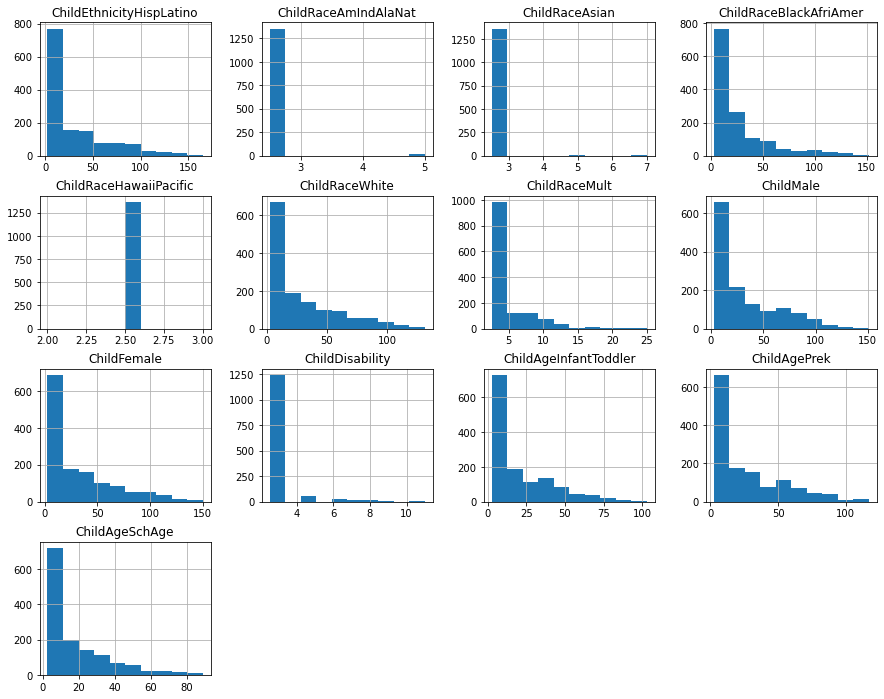

In [17]:
import matplotlib.pyplot as plt

# plot histograms of each column
fig, axis = plt.subplots(figsize=(15, 12))
austin_drop.drop(columns="ZIPCode").hist(ax=axis)

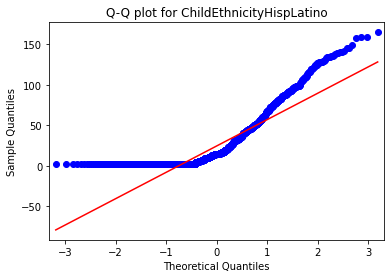

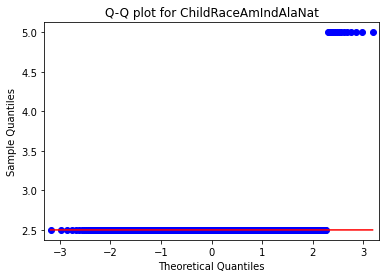

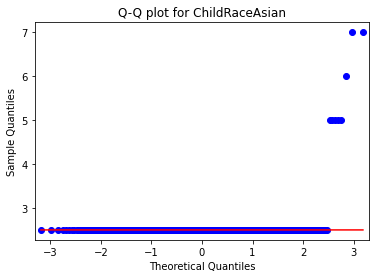

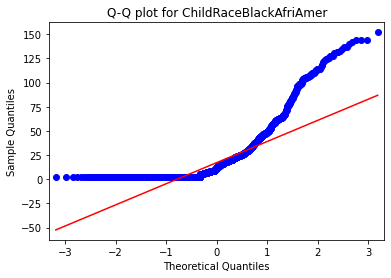

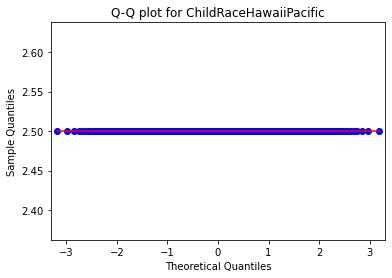

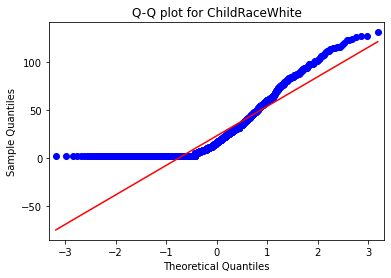

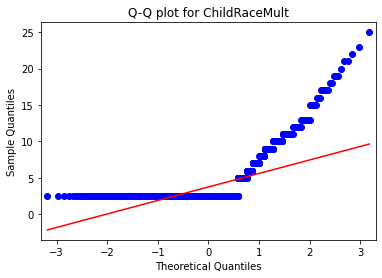

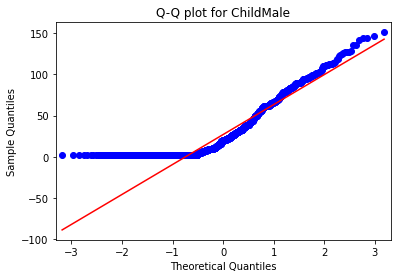

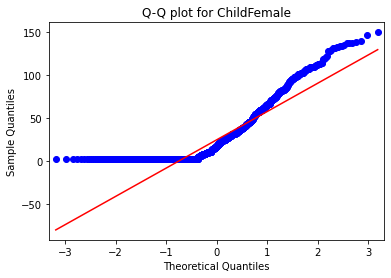

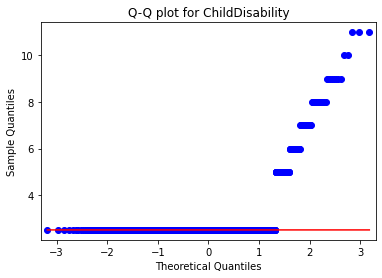

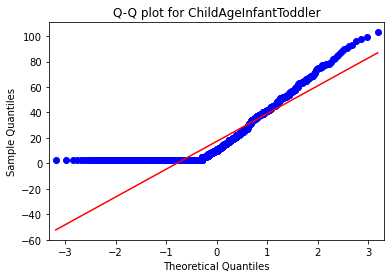

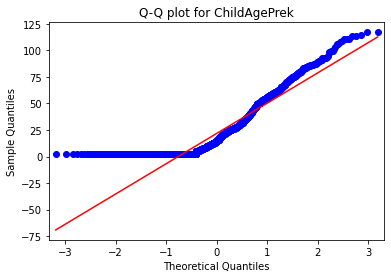

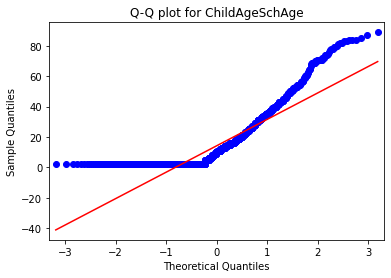

In [18]:
import statsmodels.api as sm

# plot qqplot of each column
for column in austin_drop.drop(columns=["ZIPCode"]).columns:
    sm.qqplot(austin_drop[column], line='q')
    plt.title(f'Q-Q plot for {column}')
    plt.show()

Before moving on and fixing other data quality issues, I need to figure out how to impute values based on distribution.

Context
* Missing data is <5
* Data is bound at 0
* Data is time series (data is dependent on past values)
* Data is MAR (missing at random) (ZIP code and date determines missing values most likely)
* Data is right-skewed

Problems:
* Data missing for 2021 Q3 and 2022 Q4
* Data censored for zip codes where values < 5

Solution & Issue:
* Impute with constant below 5
  * Heavily biases data as 50% of data for each quarter is imputed 
* Drop 99% imputed data
  * Removes opportunity to reveal insight (for now)
* Impute data based on remaining probability
  * Requires majority of data to be present, which is not guaranteed for all columns
  * Values are not independent of zip-code and time
* Calculate predicted estimate based on demographic data
  * Assuming similar relationships between different demographics & children in program might heavily and incorrectly bias analysis 

Selected Solution(s):
* Check which ZIP codes contain censored values
* Drop mostly missing columns (>0.8)
* Impute columns based on ZIP code & time series
* Recheck probability distributions for imputed data ...

Issue with GPT: Loops logic (tries things that you reject)

In [19]:
# drop columns
cols = (austin_drop[austin_drop == impute_val].count() / austin_drop.count() <= 0.8)
names = list(cols[cols].index)

sel_austin = austin_drop[names]
sel_austin.head()

ZIPCode  ChildEthnicityHispLatino  ChildRaceBlackAfriAmer  \
Reporting_Date                                                              
2021-01-01        78702                      21.0                    46.0   
2021-02-01        78702                      20.0                    43.0   
2021-03-01        78702                      21.0                    45.0   
2021-01-01        78703                       2.5                     2.5   
2021-02-01        78703                       2.5                     2.5   

                ChildRaceWhite  ChildRaceMult  ChildMale  ChildFemale  \
Reporting_Date                                                          
2021-01-01                19.0            5.0       44.0         28.0   
2021-02-01                18.0            5.0       39.0         29.0   
2021-03-01                22.0            2.5       42.0         31.0   
2021-01-01                 2.5            2.5        2.5          2.5   
2021-02-01                 2.5            2.5        2.5          2.5   

                ChildAgeInfantToddler  ChildAgePrek  ChildAgeSchAge  
Reporting_Date                                                       
2021-01-01                       26.0          32.0            14.0  
2021-02-01                       21.0          34.0            13.0  
2021-03-01                       25.0          34.0            14.0  
2021-01-01                        2.5           2.5             2.5  
2021-02-01                        2.5           2.5             2.5

In [20]:
sel_austin.shape

(1367, 10)

In [21]:
# let's take a look at monthly counts according to ZIP code to see if imputation might be appropriate
zipcodes = sel_austin.groupby(["ZIPCode"]).resample("1M").mean().drop(columns=["ZIPCode"]).reset_index().set_index("Reporting_Date")

# additional 300 rows is missing data
zipcodes.shape

(1647, 10)

In [22]:
import numpy as np

# sample random groups
rand_zips = zipcodes["ZIPCode"].unique()
np.random.shuffle(rand_zips)

zipcodes_rand = zipcodes[zipcodes["ZIPCode"].isin(rand_zips[:5])]

zipcodes_latino = zipcodes_rand[["ZIPCode", "ChildEthnicityHispLatino"]]
zipcodes_afriam = zipcodes_rand[["ZIPCode", "ChildRaceBlackAfriAmer"]]
zipcodes_white = zipcodes_rand[["ZIPCode", "ChildRaceWhite"]]
zipcodes_mult = zipcodes_rand[["ZIPCode", "ChildRaceMult"]]
zipcodes_male = zipcodes_rand[["ZIPCode", "ChildMale"]]
zipcodes_fema = zipcodes_rand[["ZIPCode", "ChildFemale"]]
zipcodes_infant = zipcodes_rand[["ZIPCode", "ChildAgeInfantToddler"]]
zipcodes_prek = zipcodes_rand[["ZIPCode", "ChildAgePrek"]]
zipcodes_school = zipcodes_rand[["ZIPCode", "ChildAgeSchAge"]]

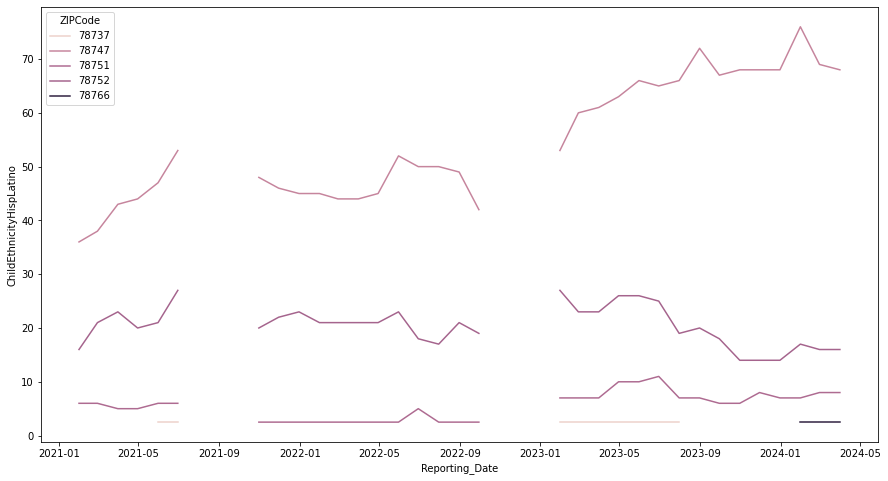

In [23]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_latino, x=zipcodes_latino.index, y="ChildEthnicityHispLatino", hue="ZIPCode")
plt.show()

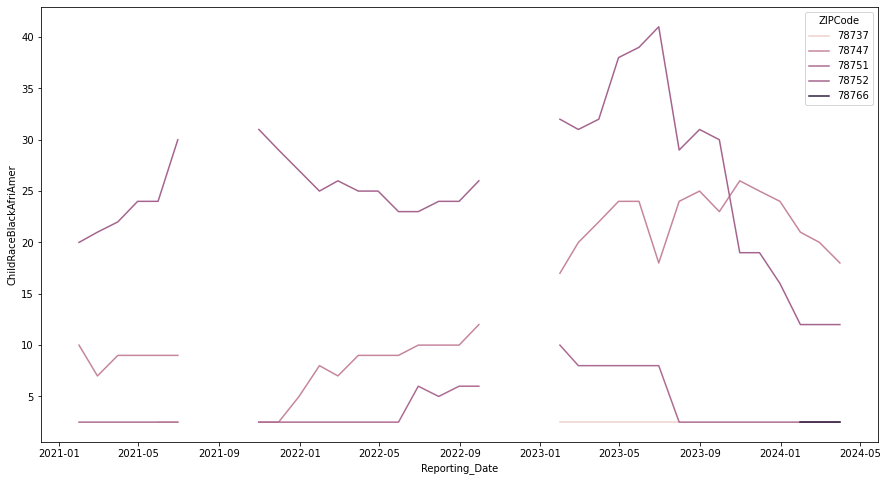

In [24]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_afriam, x=zipcodes_afriam.index, y="ChildRaceBlackAfriAmer", hue="ZIPCode")
plt.show()

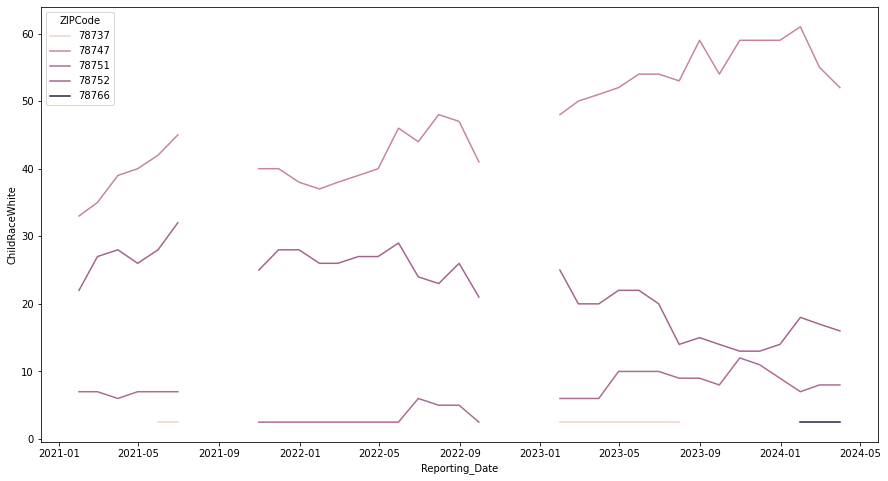

In [25]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_white, x=zipcodes_white.index, y="ChildRaceWhite", hue="ZIPCode")
plt.show()

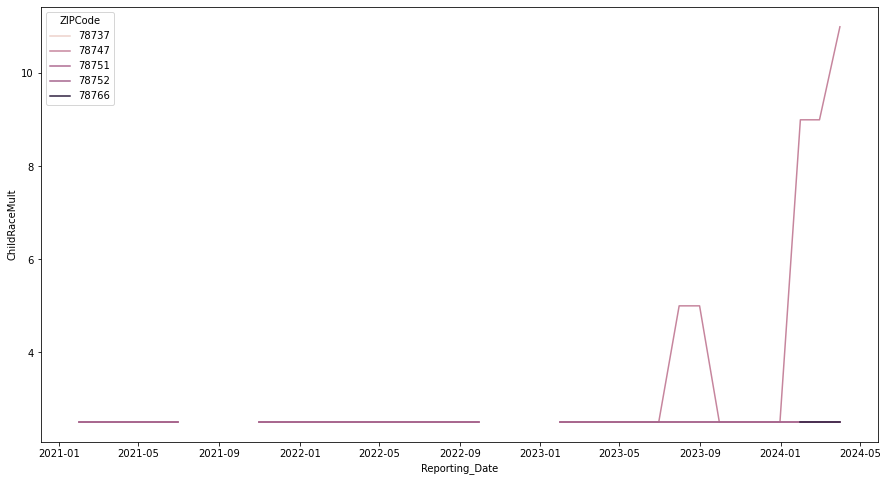

In [26]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_mult, x=zipcodes_mult.index, y="ChildRaceMult", hue="ZIPCode")
plt.show()

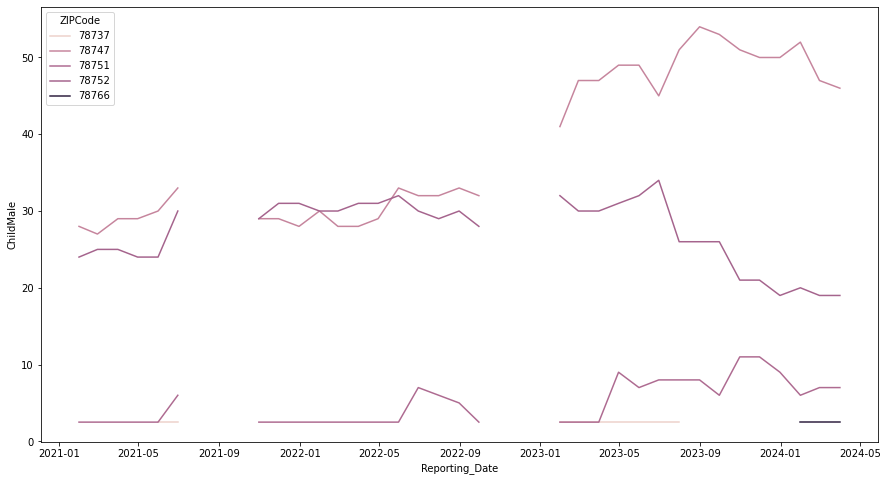

In [27]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_male, x=zipcodes_male.index, y="ChildMale", hue="ZIPCode")
plt.show()

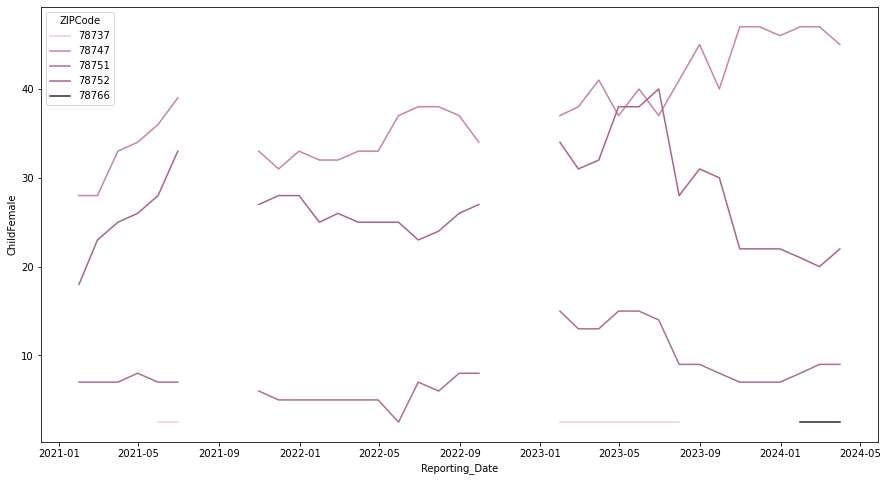

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_fema, x=zipcodes_fema.index, y="ChildFemale", hue="ZIPCode")
plt.show()

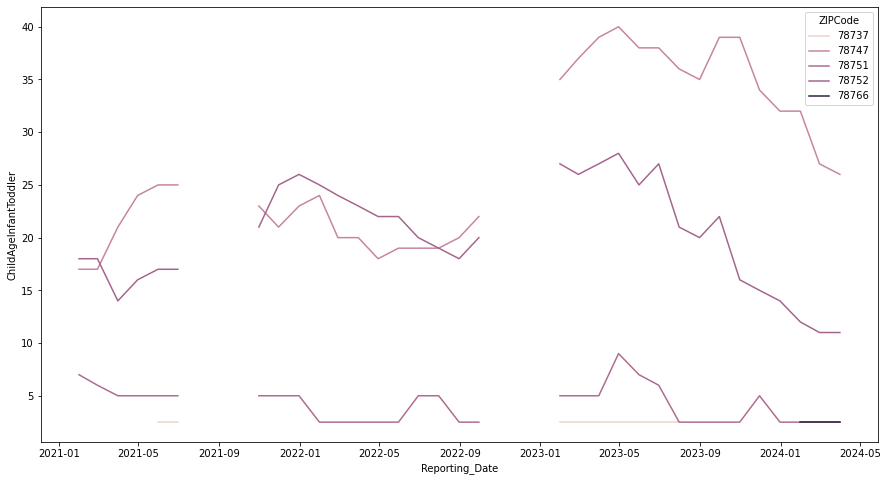

In [29]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_infant, x=zipcodes_infant.index, y="ChildAgeInfantToddler", hue="ZIPCode")
plt.show()

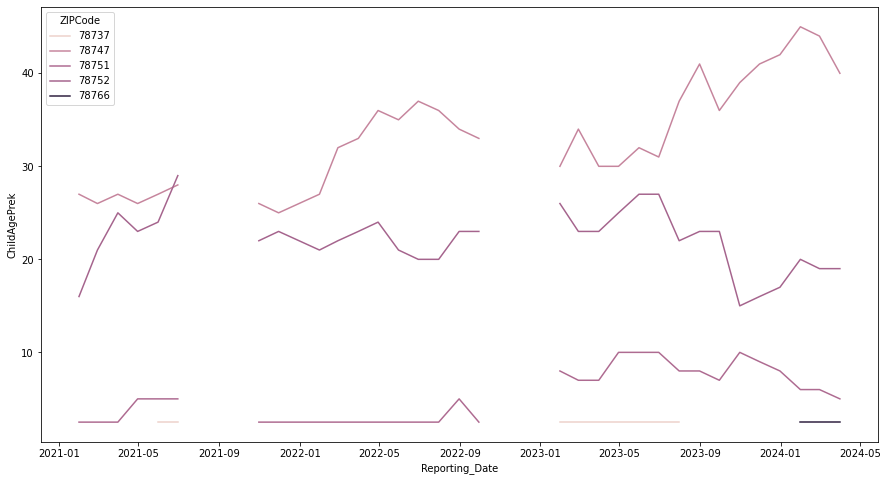

In [30]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_prek, x=zipcodes_prek.index, y="ChildAgePrek", hue="ZIPCode")
plt.show()

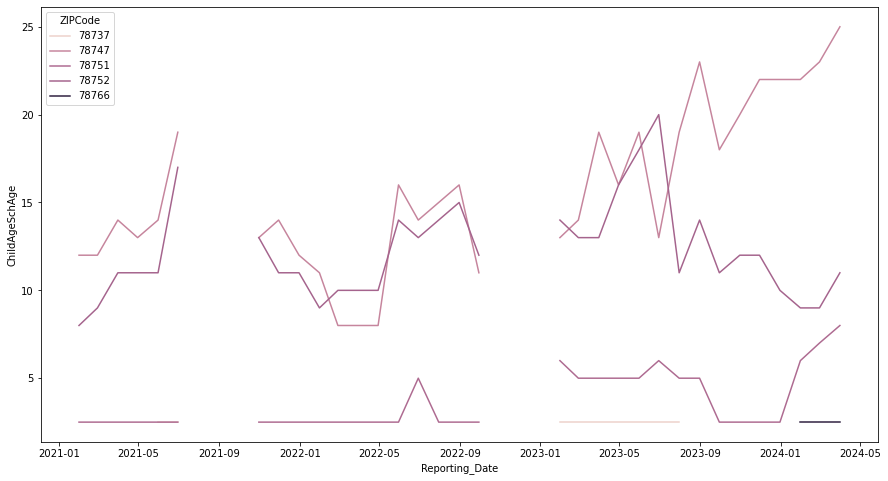

In [31]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_school, x=zipcodes_school.index, y="ChildAgeSchAge", hue="ZIPCode")
plt.show()

Further considerations:
* Not all Zip Codes have been recorded consistently for past 2 years
* Zip codes that have sizeable populations do not drastically fall below < 5

Next Steps:
* Drop ZIP codes that do not appear in all months (save for Q3 2021 and Q4 2022)
* Impute via time series 
* Recheck probabilities 

In [32]:
# select guaranteed non-null dates and join together
df1 = zipcodes.loc['2021-01-31':'2021-06-30'] 
df2 = zipcodes.loc['2021-10-31':'2022-09-30']
df3 = zipcodes.loc['2023-01-31':]

nonnull_frames = pd.concat([df1, df2, df3])

In [33]:
# select ZIP codes that are ONLY present across all months! (33 months in total)
valid_zips = (nonnull_frames.groupby("ZIPCode").count() == 33).all(axis=1)

val_zipnames = list(valid_zips[valid_zips].index)

valzip_frame = zipcodes[zipcodes["ZIPCode"].isin(val_zipnames)]

valzip_frame

ZIPCode  ChildEthnicityHispLatino  ChildRaceBlackAfriAmer  \
Reporting_Date                                                              
2021-01-31        78702                      21.0                    46.0   
2021-02-28        78702                      20.0                    43.0   
2021-03-31        78702                      21.0                    45.0   
2021-04-30        78702                      23.0                    49.0   
2021-05-31        78702                      28.0                    50.0   
...                 ...                       ...                     ...   
2023-11-30        78759                      16.0                    15.0   
2023-12-31        78759                      16.0                    14.0   
2024-01-31        78759                      20.0                    14.0   
2024-02-29        78759                      20.0                    12.0   
2024-03-31        78759                      18.0                    11.0   

                ChildRaceWhite  ChildRaceMult  ChildMale  ChildFemale  \
Reporting_Date                                                          
2021-01-31                19.0            5.0       44.0         28.0   
2021-02-28                18.0            5.0       39.0         29.0   
2021-03-31                22.0            2.5       42.0         31.0   
2021-04-30                22.0            2.5       46.0         31.0   
2021-05-31                27.0            2.5       50.0         33.0   
...                        ...            ...        ...          ...   
2023-11-30                25.0            2.5       23.0         22.0   
2023-12-31                25.0            2.5       23.0         21.0   
2024-01-31                25.0            2.5       23.0         22.0   
2024-02-29                25.0            2.5       23.0         20.0   
2024-03-31                24.0            2.5       23.0         20.0   

                ChildAgeInfantToddler  ChildAgePrek  ChildAgeSchAge  
Reporting_Date                                                       
2021-01-31                       26.0          32.0            14.0  
2021-02-28                       21.0          34.0            13.0  
2021-03-31                       25.0          34.0            14.0  
2021-04-30                       28.0          34.0            15.0  
2021-05-31                       27.0          39.0            17.0  
...                               ...           ...             ...  
2023-11-30                       13.0          16.0            16.0  
2023-12-31                       13.0          15.0            16.0  
2024-01-31                       14.0          16.0            15.0  
2024-02-29                       14.0          16.0            13.0  
2024-03-31                       12.0          17.0            14.0  

[1287 rows x 10 columns]

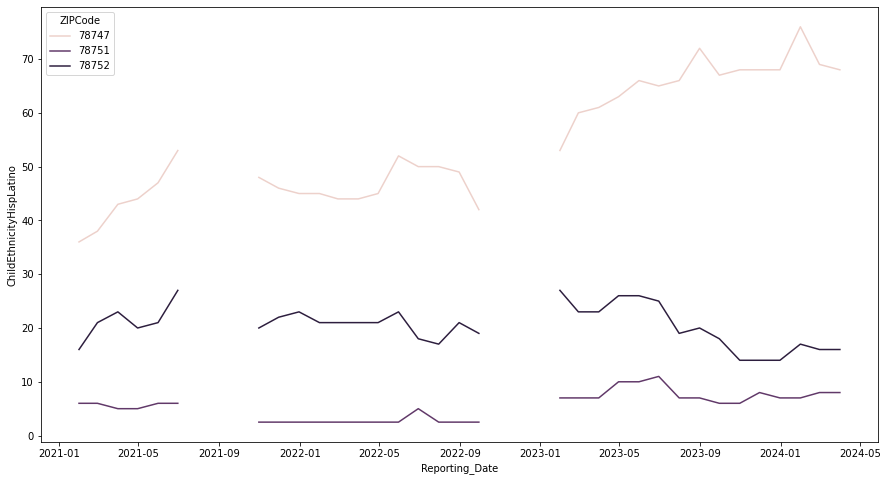

In [34]:
# plot again and notice that previous zip with mostly missing data no longer there
zipcodes_rand = valzip_frame[valzip_frame["ZIPCode"].isin(rand_zips[:5])]
zipcodes_latino = zipcodes_rand[["ZIPCode", "ChildEthnicityHispLatino"]]

plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_latino, x=zipcodes_latino.index, y="ChildEthnicityHispLatino", hue="ZIPCode")
plt.show()

In [35]:
valzip_frame.isna().sum()

ZIPCode                       0
ChildEthnicityHispLatino    198
ChildRaceBlackAfriAmer      198
ChildRaceWhite              198
ChildRaceMult               198
ChildMale                   198
ChildFemale                 198
ChildAgeInfantToddler       198
ChildAgePrek                198
ChildAgeSchAge              198
dtype: int64

In [36]:
# get ZIPS
valid_zips = valzip_frame["ZIPCode"].unique()
valid_zips

array([78702, 78703, 78704, 78717, 78721, 78722, 78723, 78724, 78725,
       78726, 78727, 78728, 78729, 78731, 78734, 78735, 78736, 78739,
       78741, 78742, 78744, 78745, 78747, 78748, 78749, 78750, 78751,
       78752, 78753, 78754, 78757, 78758, 78759], dtype=int64)

In [37]:
# get value columns
val_names = valzip_frame.drop(columns="ZIPCode").columns
val_names

Index(['ChildEthnicityHispLatino', 'ChildRaceBlackAfriAmer', 'ChildRaceWhite',
       'ChildRaceMult', 'ChildMale', 'ChildFemale', 'ChildAgeInfantToddler',
       'ChildAgePrek', 'ChildAgeSchAge'],
      dtype='object')

In [38]:
# replace missing data with ... for each ZIP code

est_zip = valzip_frame.copy(deep=True)

for zip in valid_zips:
    zip_data = est_zip[est_zip["ZIPCode"] == zip]
    
    for name in val_names:
        # apply imputation method
        imputed_data = zip_data[name].interpolate(method='time')
        est_zip.loc[est_zip["ZIPCode"] == zip, name] = imputed_data

In [39]:
est_zip.shape

(1287, 10)

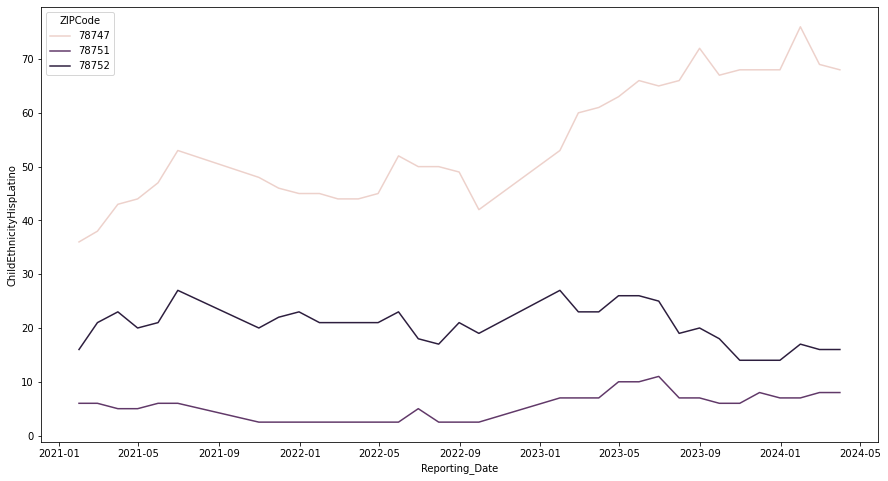

In [40]:
# plot again and notice imputed data
zipcodes_rand = est_zip[est_zip["ZIPCode"].isin(rand_zips[:5])]
zipcodes_latino = zipcodes_rand[["ZIPCode", "ChildEthnicityHispLatino"]]

plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_latino, x=zipcodes_latino.index, y="ChildEthnicityHispLatino", hue="ZIPCode")
plt.show()

In [41]:
# write dataset for persistence (will rewrite transformation steps regardless)

est_zip.to_csv("../data/transformed/child_zip.csv")

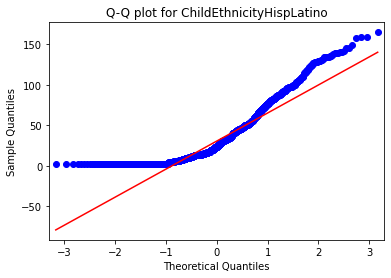

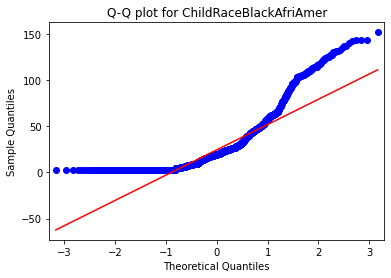

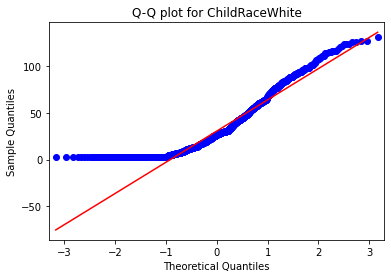

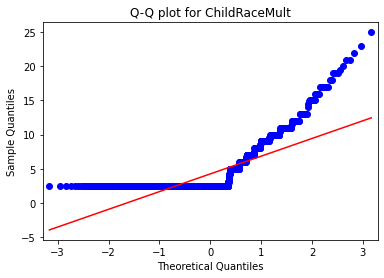

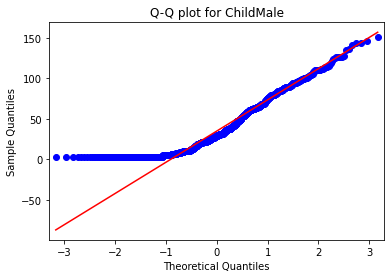

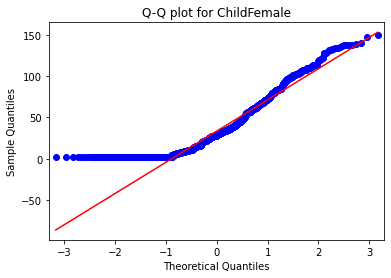

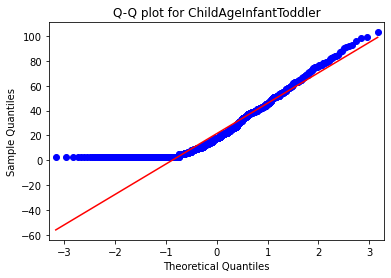

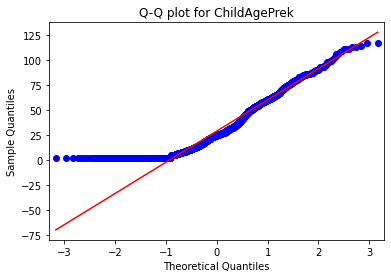

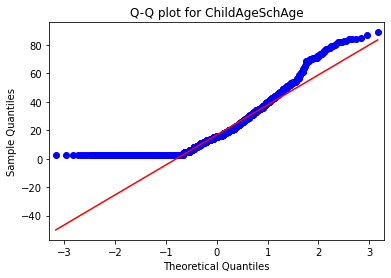

In [42]:
import statsmodels.api as sm

# plot qqplot of each column
for column in est_zip.drop(columns=["ZIPCode"]).columns:
    sm.qqplot(est_zip[column], line='q')
    plt.title(f'Q-Q plot for {column}')
    plt.show()

<ipython-input-43-1ed58a213b56>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  est_zip.drop(columns="ZIPCode").hist(ax=axis)


array([[<AxesSubplot:title={'center':'ChildEthnicityHispLatino'}>,
        <AxesSubplot:title={'center':'ChildRaceBlackAfriAmer'}>,
        <AxesSubplot:title={'center':'ChildRaceWhite'}>],
       [<AxesSubplot:title={'center':'ChildRaceMult'}>,
        <AxesSubplot:title={'center':'ChildMale'}>,
        <AxesSubplot:title={'center':'ChildFemale'}>],
       [<AxesSubplot:title={'center':'ChildAgeInfantToddler'}>,
        <AxesSubplot:title={'center':'ChildAgePrek'}>,
        <AxesSubplot:title={'center':'ChildAgeSchAge'}>]], dtype=object)

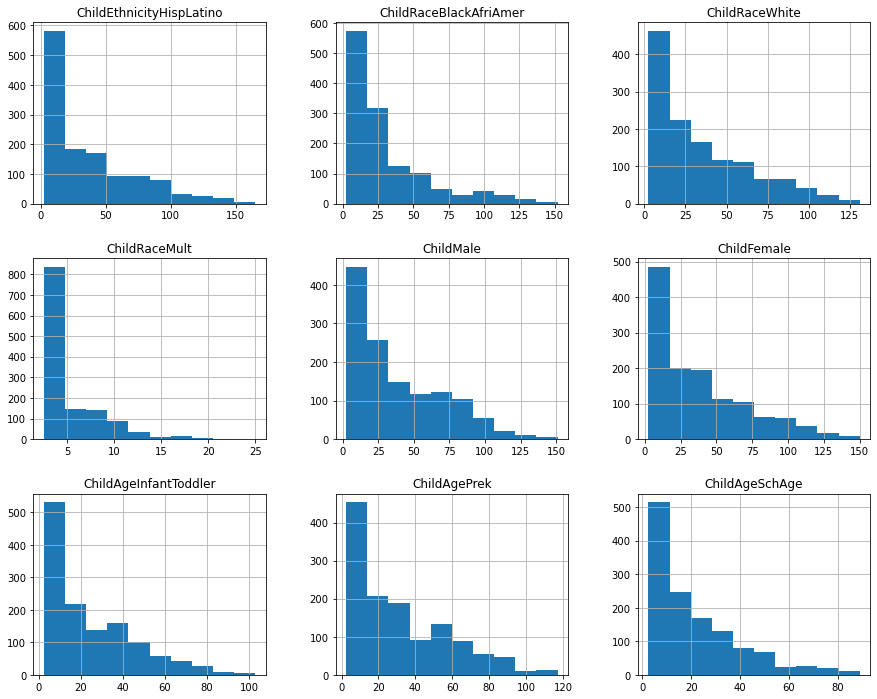

In [43]:
# re-analyze distributions and histograms

# plot histograms of each column
fig, axis = plt.subplots(figsize=(15, 12))
est_zip.drop(columns="ZIPCode").hist(ax=axis)

Text(0, 0.5, 'Average Children')

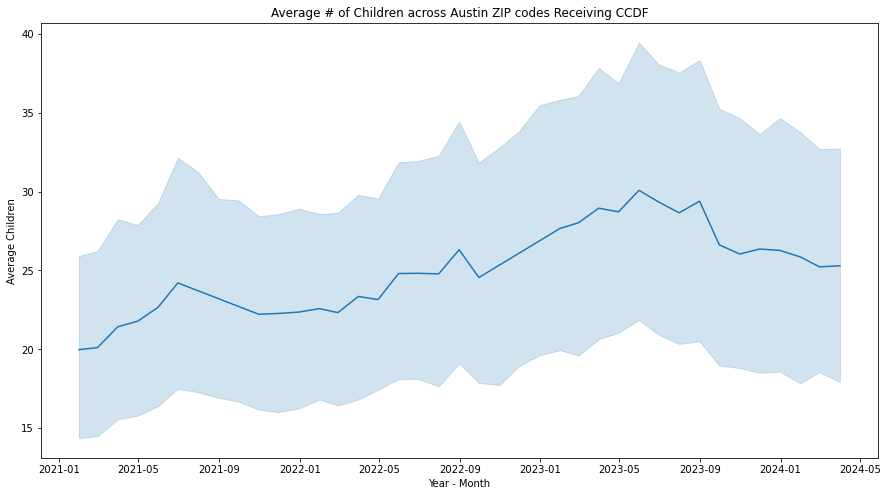

In [44]:
import matplotlib.pyplot as plt, seaborn as sns 

# calc average and get confidence intervals
means = est_zip[["ChildAgeInfantToddler", "ChildAgePrek", "ChildAgeSchAge"]].mean(axis=1)

plt.figure(figsize=(15,8))

sns.lineplot(x=est_zip.index, y=means)

plt.title("Average # of Children across Austin ZIP codes Receiving CCDF")
plt.xlabel("Year - Month")
plt.ylabel("Average Children")

In [45]:
# calculate average change from beginning date to date
mean_zipdate = est_zip.groupby(est_zip.index)[["ChildAgeInfantToddler", "ChildAgePrek", "ChildAgeSchAge"]].mean().mean(axis=1)

overall_change = (mean_zipdate[-1] - mean_zipdate[0])/mean_zipdate[0] * 100
print("change from beginning of Q1 2021 to end of Q1 2024 =", round(overall_change, 2), "%")

change from beginning of Q1 2021 to end of Q1 2024 = 26.62 %


In [46]:
mean_zipdate[0]

19.974747474747478

In [47]:
mean_zipdate[-1]

25.29292929292929

In [48]:
q3q1_change = (mean_zipdate.loc["2024-03-31"] - mean_zipdate.loc["2023-08-31"])/mean_zipdate.loc["2023-08-31"] * 100

print("change from beginning of Q3 2023 to end of Q1 2024 =", round(q3q1_change, 2), "%")

change from beginning of Q3 2023 to end of Q1 2024 = -13.95 %


In [49]:
mean_zipdate.loc["2023-08-31"]

29.393939393939394

In [50]:
mean_zipdate.loc["2024-03-31"]

25.29292929292929

## ARIMA Modeling

Let's see where this trend will lead. First let's decompose.

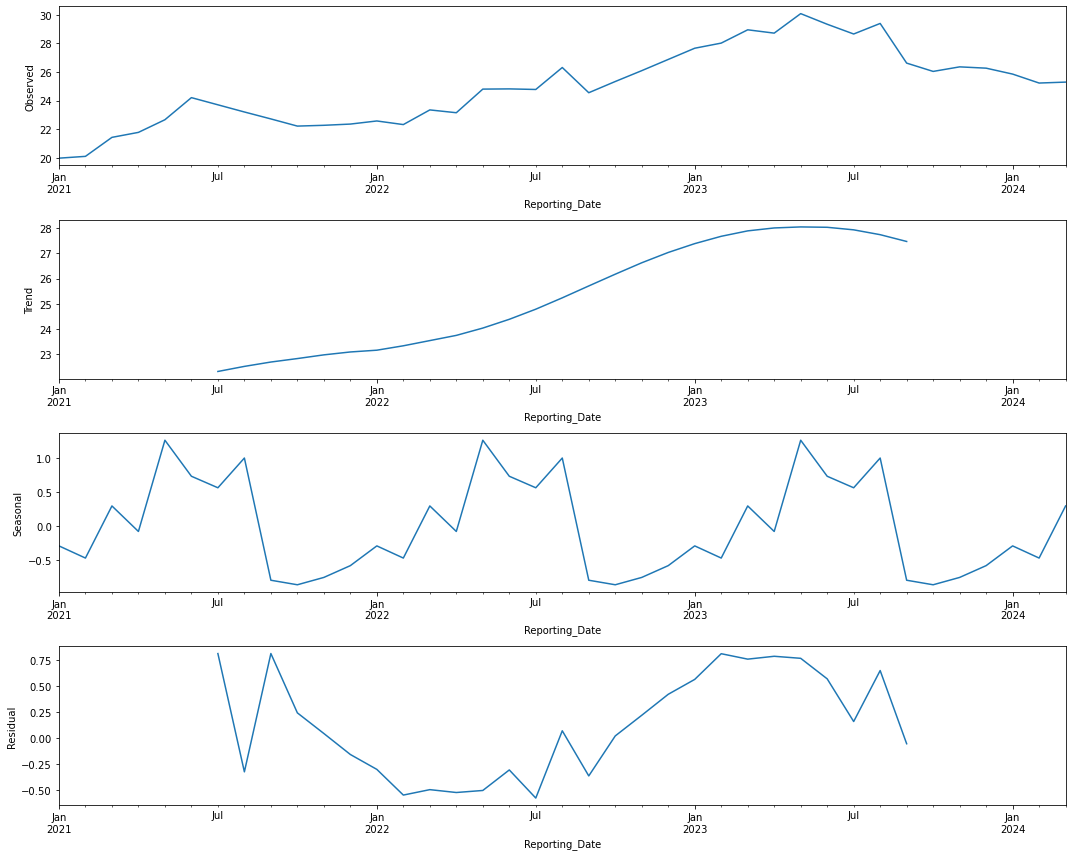

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

# ty chat-gpt
# Decompose the time series
decomposition = seasonal_decompose(mean_zipdate)

# Create a larger figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

# Plot the decomposed components
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

# Display the figure
plt.tight_layout()
plt.show()

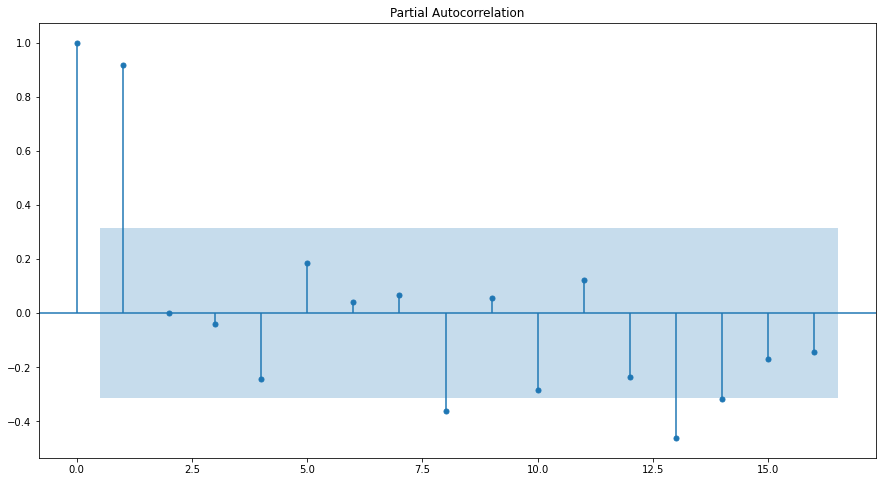

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf

# ty chatgpt
# Create a larger figure
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the PACF on the larger figure
pacf = plot_pacf(mean_zipdate, ax=ax)

# Display the figure
plt.show()


In [53]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(mean_zipdate, order=(2,2,0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   39
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -49.211
Date:                Mon, 29 Jul 2024   AIC                            104.422
Time:                        15:20:29   BIC                            109.255
Sample:                    01-31-2021   HQIC                           106.126
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9266      0.122     -7.572      0.000      -1.166      -0.687
ar.L2         -0.4880      0.114     -4.294      0.000      -0.711      -0.265
sigma2         0.8140      0.222      3.666      0.0

c:\Users\saidmf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
c:\Users\saidmf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
c:\Users\saidmf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Reporting_Date'>

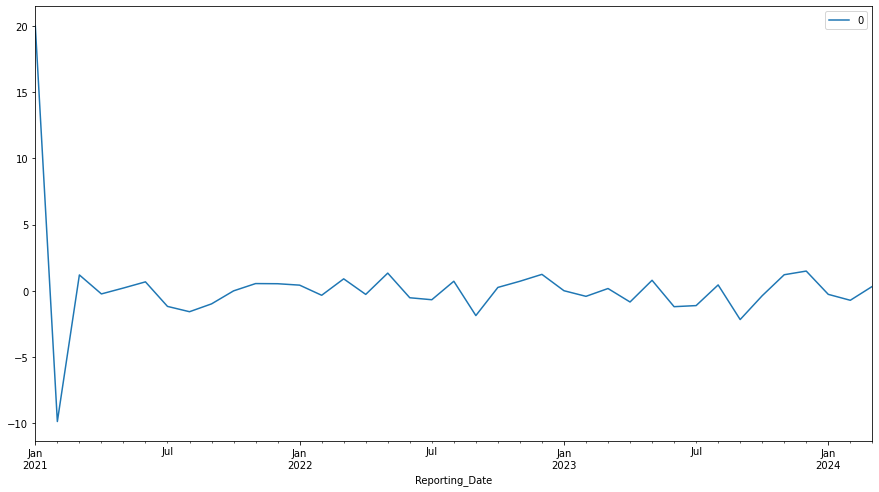

In [54]:
fig, ax = plt.subplots(figsize=(15, 8))

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(ax=ax)

<AxesSubplot:ylabel='Density'>

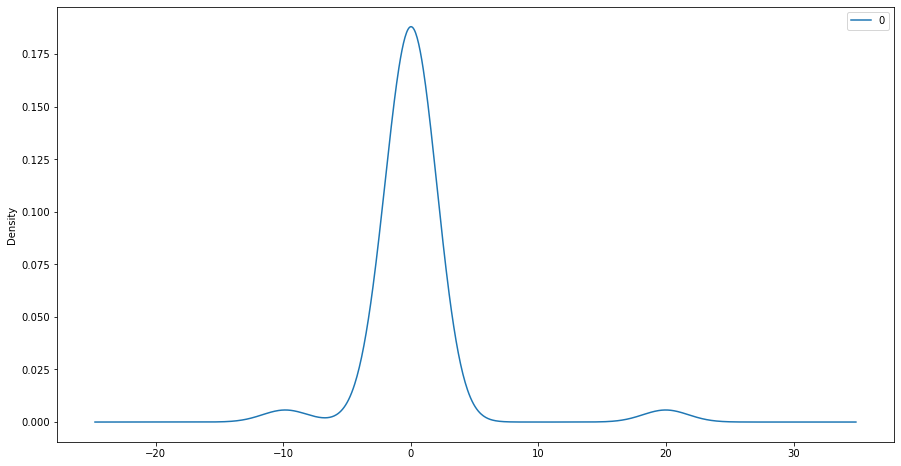

In [55]:
fig, ax = plt.subplots(figsize=(15, 8))

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde', ax=ax)

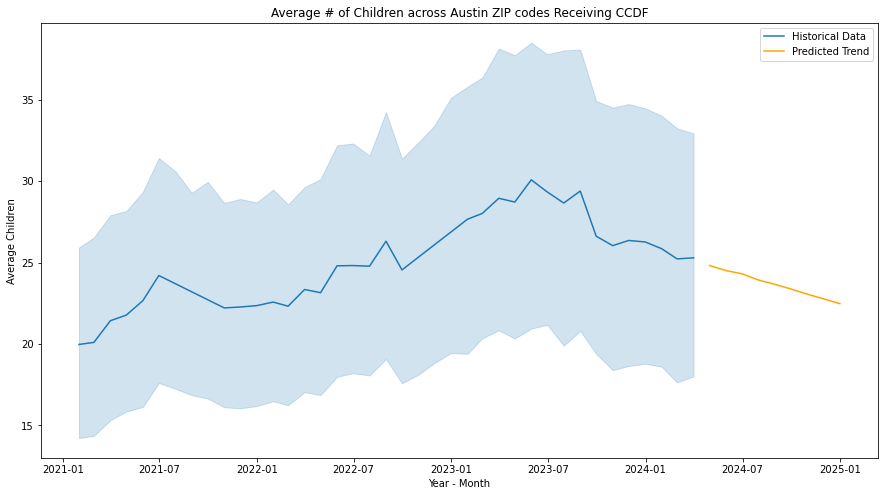

In [56]:
import matplotlib.pyplot as plt, seaborn as sns 

# get forecasts
predicted = model_fit.forecast(9)

plt.figure(figsize=(15,8))

sns.lineplot(x=est_zip.index, y=means)
sns.lineplot(x=predicted.index, y=predicted, color="orange")

plt.title("Average # of Children across Austin ZIP codes Receiving CCDF")
plt.xlabel("Year - Month")
plt.ylabel("Average Children")

plt.legend(["Historical Data", "Predicted Trend"])

plt.show()

In [57]:
predicted

2024-04-30    24.820974
2024-05-31    24.509524
2024-06-30    24.311692
2024-07-31    23.930262
2024-08-31    23.663508
2024-09-30    23.380088
2024-10-31    23.056151
2024-11-30    22.777889
2024-12-31    22.477077
Freq: M, Name: predicted_mean, dtype: float64

# Graphs According to Demographics

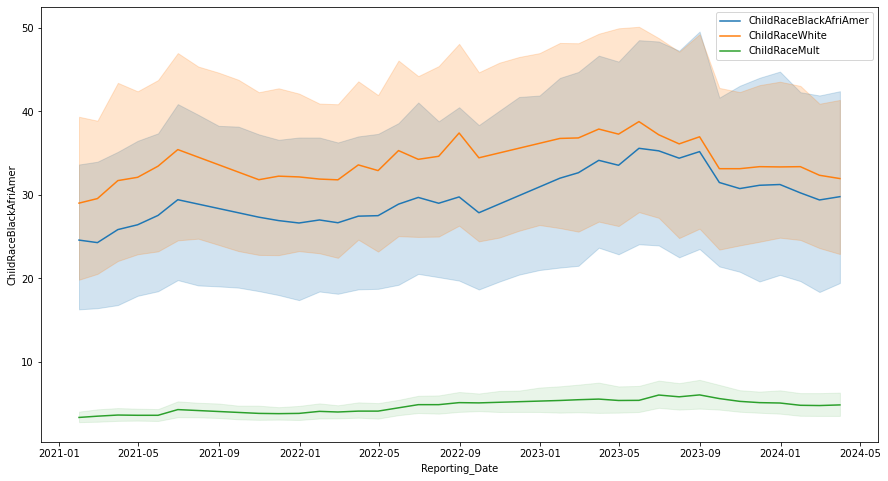

In [58]:
# plot changes according to race
plt.figure(figsize=(15,8))

sns.lineplot(x=est_zip.index, y=est_zip.ChildRaceBlackAfriAmer)
sns.lineplot(x=est_zip.index, y=est_zip.ChildRaceWhite)
# change opacity of CI
sns.lineplot(x=est_zip.index, y=est_zip.ChildRaceMult, err_kws={"alpha": .1})

plt.legend(labels=["ChildRaceBlackAfriAmer", "ChildRaceWhite", "ChildRaceMult"])

plt.show()

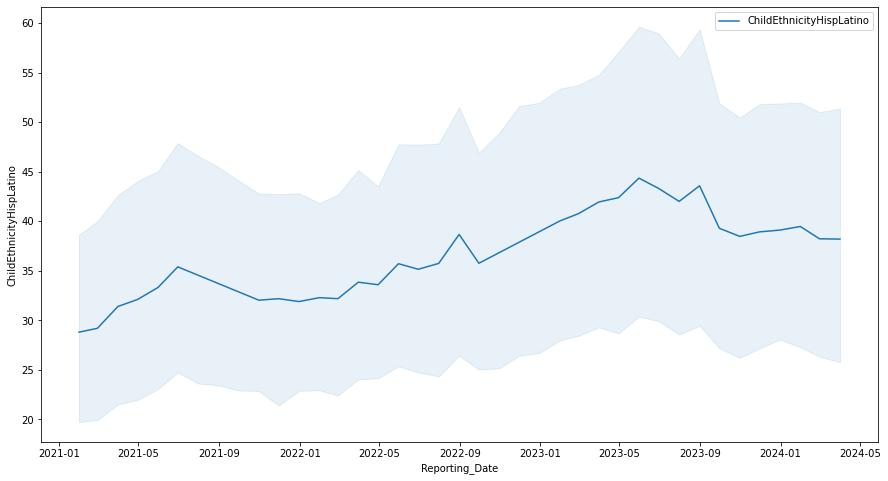

In [59]:
# plot changes according to ethnicity
plt.figure(figsize=(15,8))

sns.lineplot(x=est_zip.index, y=est_zip.ChildEthnicityHispLatino, err_kws={"alpha": .1})

plt.legend(labels=["ChildEthnicityHispLatino"])

plt.show()

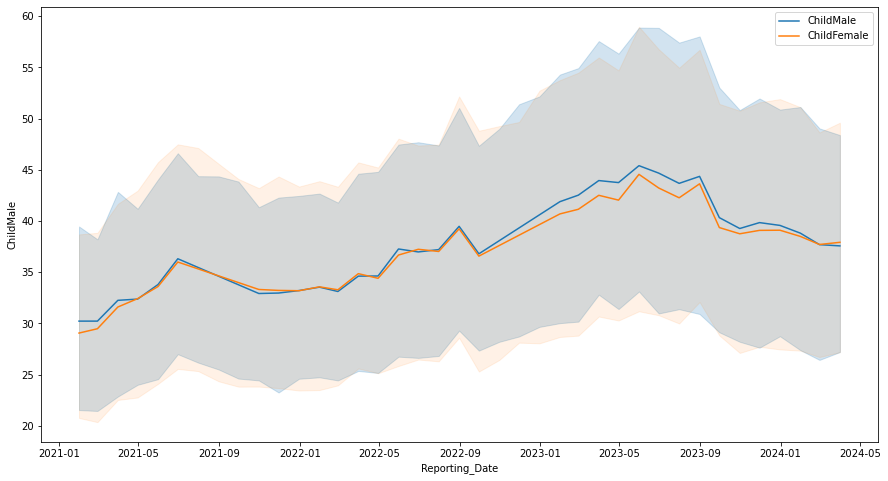

In [60]:
plt.figure(figsize=(15,8))

sns.lineplot(x=est_zip.index, y=est_zip.ChildMale)
sns.lineplot(x=est_zip.index, y=est_zip.ChildFemale, err_kws={"alpha":.1})

plt.legend(labels=["ChildMale", "ChildFemale"])

plt.show()

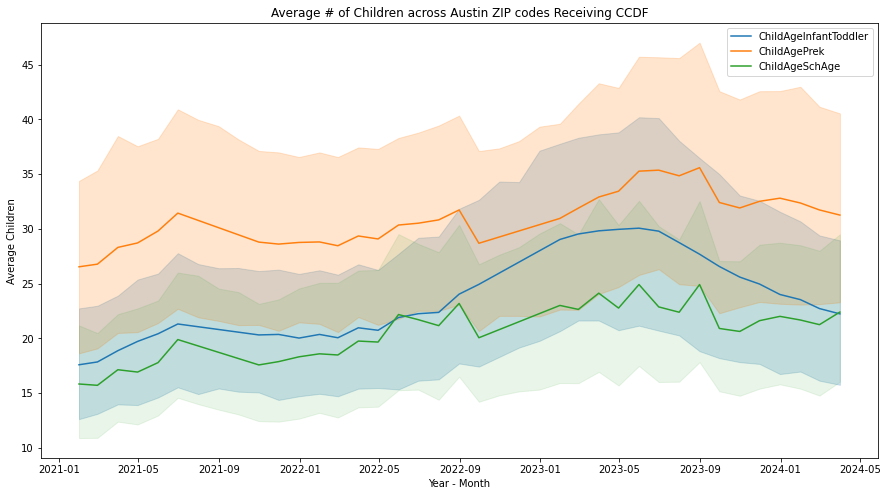

In [61]:
plt.figure(figsize=(15,8))

sns.lineplot(x=est_zip.index, y=est_zip.ChildAgeInfantToddler)
sns.lineplot(x=est_zip.index, y=est_zip.ChildAgePrek)
sns.lineplot(x=est_zip.index, y=est_zip.ChildAgeSchAge, err_kws={"alpha":.1})

plt.legend(labels=["ChildAgeInfantToddler", "ChildAgePrek", "ChildAgeSchAge"])

plt.title("Average # of Children across Austin ZIP codes Receiving CCDF")
plt.xlabel("Year - Month")
plt.ylabel("Average Children")

plt.show()

In [62]:
# calculate average change from beginning date to date
age_change = est_zip.groupby(est_zip.index).mean()[["ChildAgeInfantToddler", "ChildAgePrek", "ChildAgeSchAge"]]

overall_change = (age_change.iloc[-1] - age_change.iloc[0])/age_change.iloc[0] * 100
print("change from beginning of Q1 2021 to end of Q1 2024 =")
overall_change

change from beginning of Q1 2021 to end of Q1 2024 =


ChildAgeInfantToddler    26.465517
ChildAgePrek             17.818389
ChildAgeSchAge           41.570881
dtype: float64

In [63]:
age_change.iloc[0]

ChildAgeInfantToddler    17.575758
ChildAgePrek             26.530303
ChildAgeSchAge           15.818182
Name: 2021-01-31 00:00:00, dtype: float64

In [64]:
age_change.iloc[-1]

ChildAgeInfantToddler    22.227273
ChildAgePrek             31.257576
ChildAgeSchAge           22.393939
Name: 2024-03-31 00:00:00, dtype: float64

In [65]:
# calculate average change from q3 2023 to q1 2024
q3q1_change = (age_change.loc["2024-03-31"] - age_change.loc["2023-08-31"])/age_change.loc["2023-08-31"] * 100

print("change from beginning of Q3 2023 to end of Q1 2024 for age demographics =")
q3q1_change

change from beginning of Q3 2023 to end of Q1 2024 for age demographics =


ChildAgeInfantToddler   -19.704433
ChildAgePrek            -12.175394
ChildAgeSchAge          -10.097324
dtype: float64

In [66]:
age_change.loc["2023-08-31"]

ChildAgeInfantToddler    27.681818
ChildAgePrek             35.590909
ChildAgeSchAge           24.909091
Name: 2023-08-31 00:00:00, dtype: float64

In [67]:
age_change.loc["2024-03-31"]

ChildAgeInfantToddler    22.227273
ChildAgePrek             31.257576
ChildAgeSchAge           22.393939
Name: 2024-03-31 00:00:00, dtype: float64

Overall we see an increase in avg number of children in families enrolled for Child Care and Development Fund (CCDF) assistance. There is a notable decrease from beginning of 2023 Q3 to end of 2024 Q1, but trend is overall positive. Some specific metrics to discuss include:

* Overall percent increase according to each demographic
* Overall percent decrease from 2023 Q3 to 2024 Q1
* Demographics that experienced greatest change 



In [68]:
first_row = est_zip.groupby(est_zip.index).mean().drop(columns="ZIPCode").iloc[0]
last_row = est_zip.groupby(est_zip.index).mean().drop(columns="ZIPCode").iloc[-1]

first_row

ChildEthnicityHispLatino    28.803030
ChildRaceBlackAfriAmer      24.590909
ChildRaceWhite              29.015152
ChildRaceMult                3.363636
ChildMale                   30.227273
ChildFemale                 29.060606
ChildAgeInfantToddler       17.575758
ChildAgePrek                26.530303
ChildAgeSchAge              15.818182
Name: 2021-01-31 00:00:00, dtype: float64

In [69]:
# resort 
last_row = last_row.sort_values(ascending=False)
first_row = first_row.reindex(last_row.index)

first_row

ChildEthnicityHispLatino    28.803030
ChildFemale                 29.060606
ChildMale                   30.227273
ChildRaceWhite              29.015152
ChildAgePrek                26.530303
ChildRaceBlackAfriAmer      24.590909
ChildAgeSchAge              15.818182
ChildAgeInfantToddler       17.575758
ChildRaceMult                3.363636
Name: 2021-01-31 00:00:00, dtype: float64

In [70]:
last_row

ChildEthnicityHispLatino    38.196970
ChildFemale                 37.924242
ChildMale                   37.575758
ChildRaceWhite              31.954545
ChildAgePrek                31.257576
ChildRaceBlackAfriAmer      29.787879
ChildAgeSchAge              22.393939
ChildAgeInfantToddler       22.227273
ChildRaceMult                4.863636
Name: 2024-03-31 00:00:00, dtype: float64

In [71]:
(last_row - first_row).sort_values(ascending=False)

ChildEthnicityHispLatino    9.393939
ChildFemale                 8.863636
ChildMale                   7.348485
ChildAgeSchAge              6.575758
ChildRaceBlackAfriAmer      5.196970
ChildAgePrek                4.727273
ChildAgeInfantToddler       4.651515
ChildRaceWhite              2.939394
ChildRaceMult               1.500000
dtype: float64

In [72]:
perc_change = ((last_row - first_row)/first_row * 100).sort_values(ascending=False)
perc_change

ChildRaceMult               44.594595
ChildAgeSchAge              41.570881
ChildEthnicityHispLatino    32.614413
ChildFemale                 30.500521
ChildAgeInfantToddler       26.465517
ChildMale                   24.310777
ChildRaceBlackAfriAmer      21.133703
ChildAgePrek                17.818389
ChildRaceWhite              10.130548
dtype: float64

In [73]:
perc_change.mean()

27.682149517900584

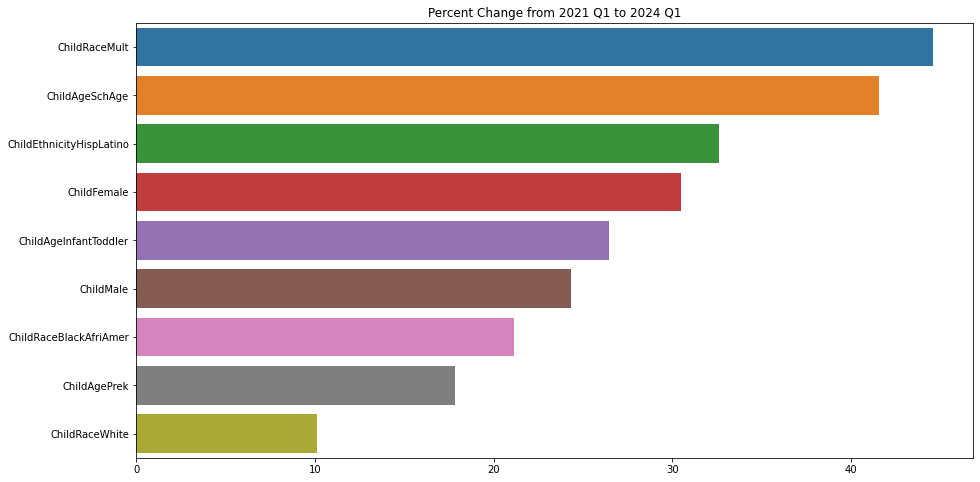

In [74]:
# bar chart of values
plt.figure(figsize=(15,8))

sns.barplot(x=perc_change.values, y=perc_change.index, orient = 'h')
plt.title('Percent Change from 2021 Q1 to 2024 Q1')
plt.show()

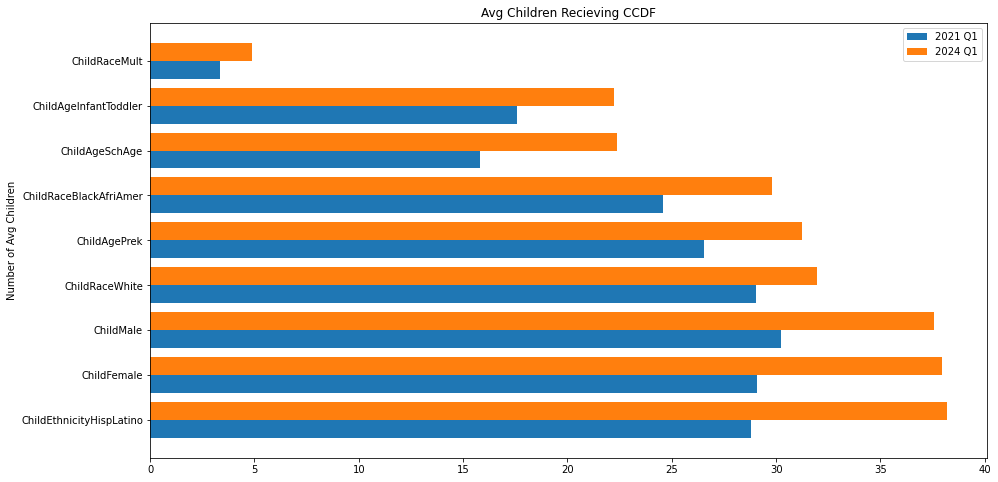

In [75]:
X_axis = np.arange(len(first_row)) 

plt.figure(figsize=(15,8))
plt.barh(X_axis - 0.2, first_row, 0.4, label = '2021 Q1') 
plt.barh(X_axis + 0.2, last_row, 0.4, label = '2024 Q1') 

plt.yticks(X_axis, first_row.index)
plt.ylabel("Number of Avg Children") 
plt.title("Avg Children Recieving CCDF") 
plt.legend()
plt.show()

In [76]:
# do the same for q3 2023 and q1 2024

first_date = est_zip.groupby(est_zip.index).mean().drop(columns="ZIPCode").loc["2023-08-31"]
last_date = est_zip.groupby(est_zip.index).mean().drop(columns="ZIPCode").loc["2024-03-31"]

# resort 
last_date = last_date.sort_values(ascending=False)
first_date = first_date.reindex(last_row.index)

first_date

ChildEthnicityHispLatino    43.575758
ChildFemale                 43.636364
ChildMale                   44.363636
ChildRaceWhite              36.954545
ChildAgePrek                35.590909
ChildRaceBlackAfriAmer      35.181818
ChildAgeSchAge              24.909091
ChildAgeInfantToddler       27.681818
ChildRaceMult                6.060606
Name: 2023-08-31 00:00:00, dtype: float64

In [77]:
last_date

ChildEthnicityHispLatino    38.196970
ChildFemale                 37.924242
ChildMale                   37.575758
ChildRaceWhite              31.954545
ChildAgePrek                31.257576
ChildRaceBlackAfriAmer      29.787879
ChildAgeSchAge              22.393939
ChildAgeInfantToddler       22.227273
ChildRaceMult                4.863636
Name: 2024-03-31 00:00:00, dtype: float64

In [78]:
(last_date - first_date).sort_values()

ChildMale                  -6.787879
ChildFemale                -5.712121
ChildAgeInfantToddler      -5.454545
ChildRaceBlackAfriAmer     -5.393939
ChildEthnicityHispLatino   -5.378788
ChildRaceWhite             -5.000000
ChildAgePrek               -4.333333
ChildAgeSchAge             -2.515152
ChildRaceMult              -1.196970
dtype: float64

In [79]:
((last_date - first_date) / first_date).sort_values()

ChildRaceMult              -0.197500
ChildAgeInfantToddler      -0.197044
ChildRaceBlackAfriAmer     -0.153316
ChildMale                  -0.153005
ChildRaceWhite             -0.135301
ChildFemale                -0.130903
ChildEthnicityHispLatino   -0.123435
ChildAgePrek               -0.121754
ChildAgeSchAge             -0.100973
dtype: float64

In [80]:
((last_date - first_date) / first_date).mean()

-0.14591472641672137

## Deeper Dive Into Individual ZIP Code

While we see a month over month increase of children on this fund, will greater insight be revealed by ZIP Code?

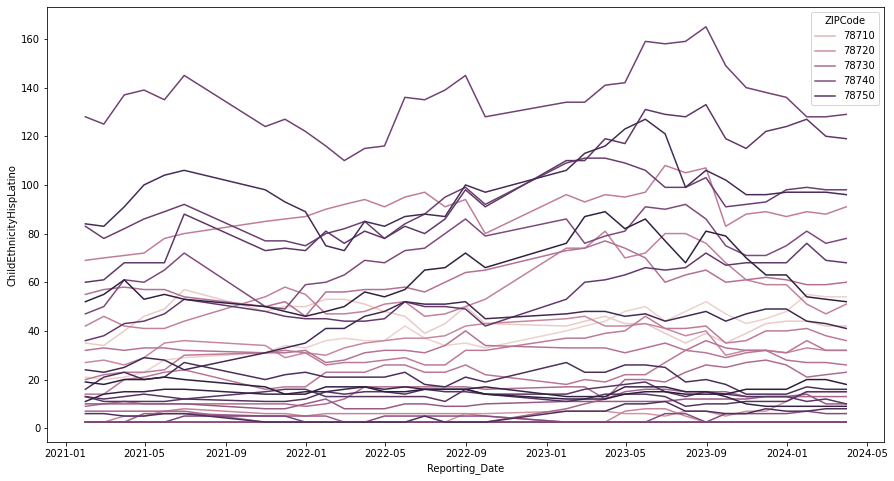

In [81]:
# plot all line plots for all zip codes to see if any zip code experienced massive increases

plt.figure(figsize=(15,8))
sns.lineplot(data=est_zip, x=est_zip.index, y="ChildEthnicityHispLatino", hue="ZIPCode")
plt.show()

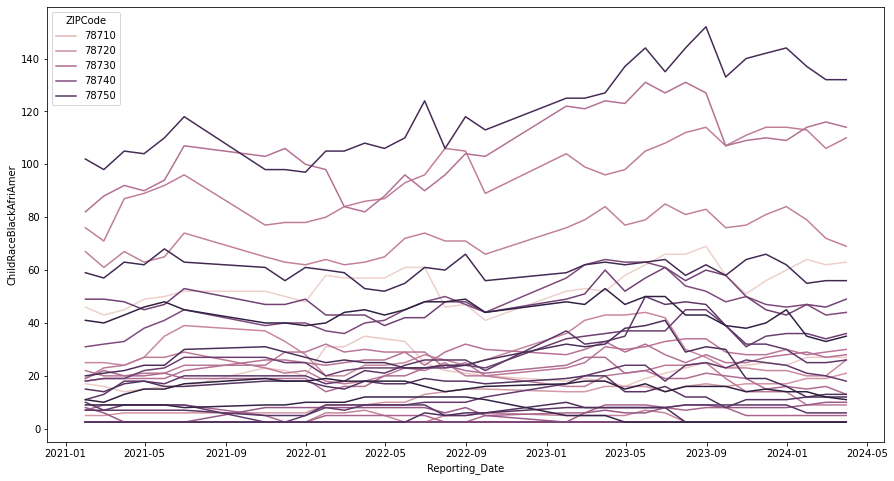

In [82]:
plt.figure(figsize=(15,8))
sns.lineplot(data=est_zip, x=est_zip.index, y="ChildRaceBlackAfriAmer", hue="ZIPCode")
plt.show()

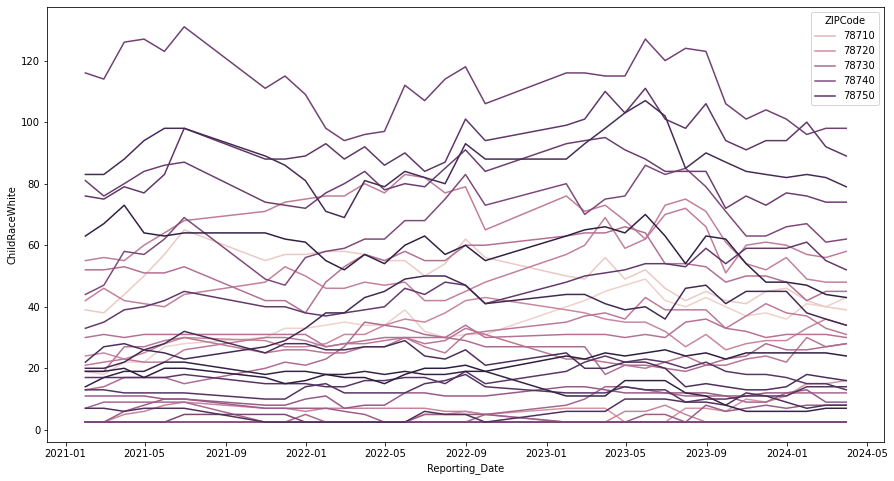

In [83]:
plt.figure(figsize=(15,8))
sns.lineplot(data=est_zip, x=est_zip.index, y="ChildRaceWhite", hue="ZIPCode")
plt.show()

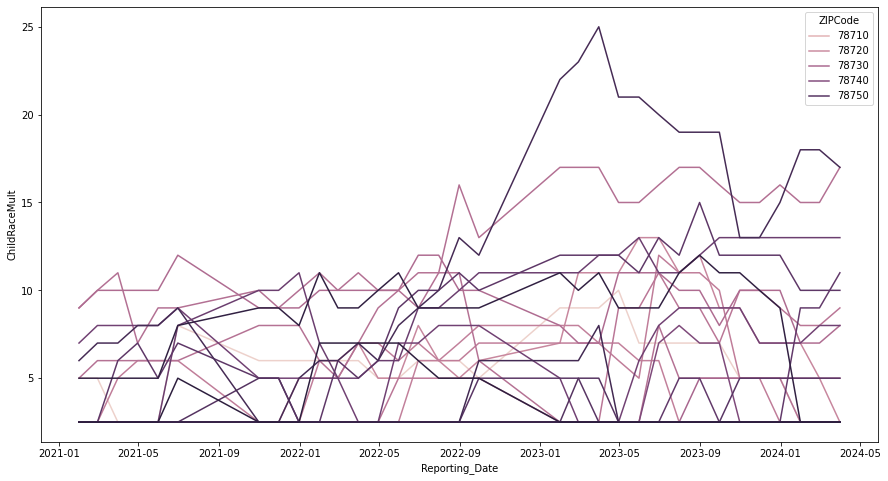

In [84]:
plt.figure(figsize=(15,8))
sns.lineplot(data=est_zip, x=est_zip.index, y="ChildRaceMult", hue="ZIPCode")
plt.show()

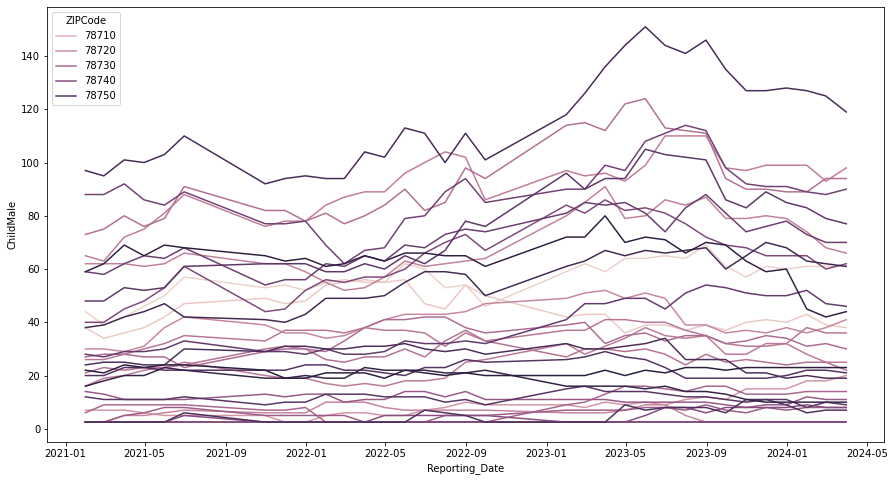

In [85]:
plt.figure(figsize=(15,8))
sns.lineplot(data=est_zip, x=est_zip.index, y="ChildMale", hue="ZIPCode")
plt.show()

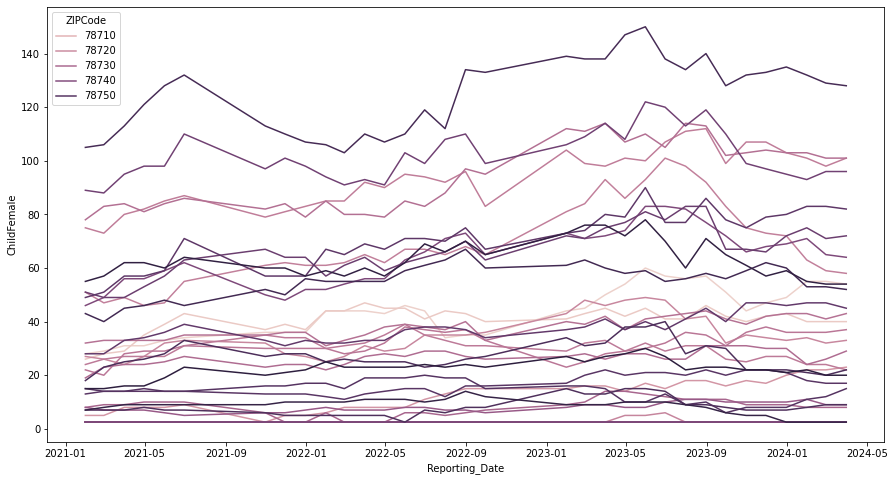

In [86]:
plt.figure(figsize=(15,8))
sns.lineplot(data=est_zip, x=est_zip.index, y="ChildFemale", hue="ZIPCode")
plt.show()

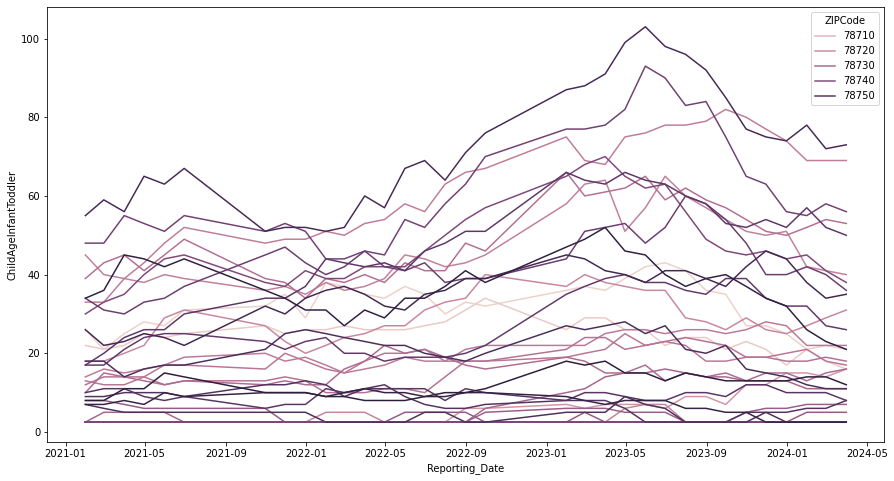

In [87]:
plt.figure(figsize=(15,8))
sns.lineplot(data=est_zip, x=est_zip.index, y="ChildAgeInfantToddler", hue="ZIPCode")
plt.show()

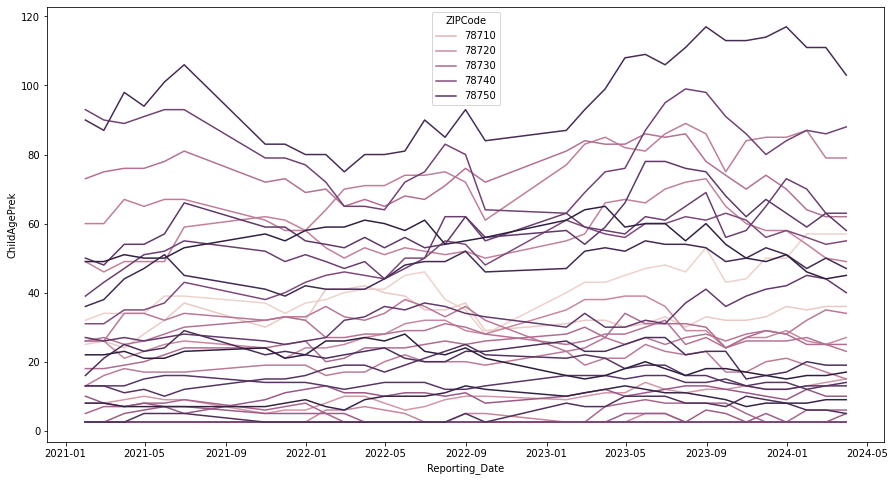

In [88]:
plt.figure(figsize=(15,8))
sns.lineplot(data=est_zip, x=est_zip.index, y="ChildAgePrek", hue="ZIPCode")
plt.show()

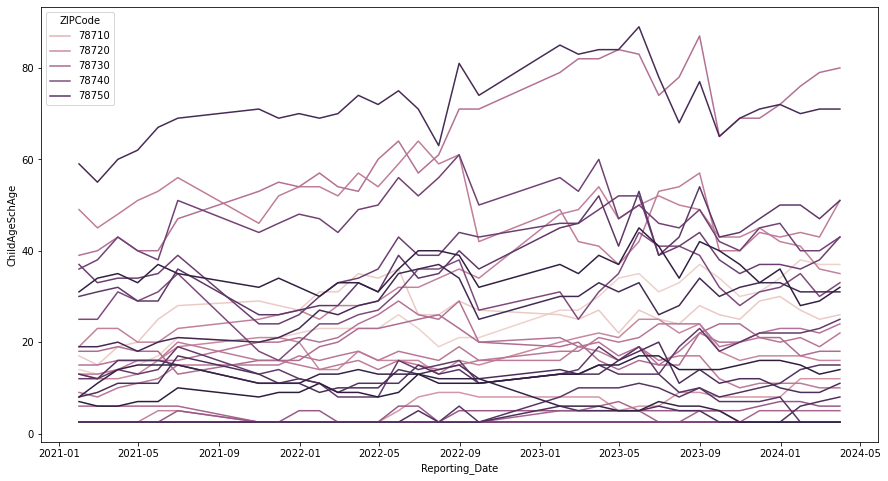

In [89]:
plt.figure(figsize=(15,8))
sns.lineplot(data=est_zip, x=est_zip.index, y="ChildAgeSchAge", hue="ZIPCode")
plt.show()

In [90]:
# get avg change according to zip code (select only age demos since overlap exists)
avg_zip = est_zip.set_index(["ZIPCode", est_zip.index])[["ChildAgeInfantToddler", "ChildAgePrek", "ChildAgeSchAge"]].mean(axis=1).reset_index()

avg_zip["ZIPCode"].nunique()

33

In [91]:
# compare percent difference between first date and last date for zip code
first_date = avg_zip[avg_zip["Reporting_Date"] == "2021-01-31"].set_index("ZIPCode")
last_date = avg_zip[avg_zip["Reporting_Date"] == "2024-03-31"].set_index("ZIPCode")

zip_change = ((last_date[0] - first_date[0])/first_date[0] * 100).sort_values(ascending=False)
zip_change[:3]

ZIPCode
78717    230.769231
78734     93.333333
78748     63.917526
Name: 0, dtype: float64

In [92]:
zip_diff = ((last_date[0] - first_date[0])).sort_values(ascending=False)
zip_diff[:3]

ZIPCode
78748    20.666667
78724    19.000000
78728    14.666667
Name: 0, dtype: float64

In [93]:
zip_diff[:3].index

Int64Index([78748, 78724, 78728], dtype='int64', name='ZIPCode')

In [94]:
avg_zip[avg_zip["ZIPCode"].isin(zip_diff[:3].index)]["ZIPCode"]

273    78724
274    78724
275    78724
276    78724
277    78724
       ...  
931    78748
932    78748
933    78748
934    78748
935    78748
Name: ZIPCode, Length: 117, dtype: int64

In [95]:
# calc averages across ZIP codes
notable_zips = avg_zip[avg_zip["ZIPCode"].isin(zip_diff[:3].index)].groupby(["ZIPCode", "Reporting_Date"]).mean()
notable_zips = notable_zips.reset_index().set_index("Reporting_Date")
notable_zips["ZIPCode"].nunique()

3

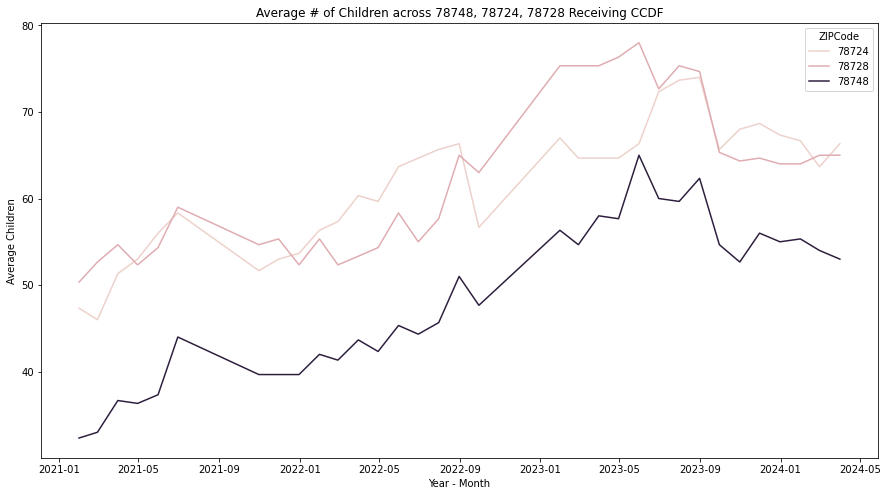

In [96]:
plt.figure(figsize=(15,8))

sns.lineplot(data=notable_zips, x=notable_zips.index, y=notable_zips[0], hue="ZIPCode")

plt.title("Average # of Children across 78748, 78724, 78728 Receiving CCDF")
plt.xlabel("Year - Month")
plt.ylabel("Average Children")

plt.show()

In [97]:
first_date.loc[78728]

Reporting_Date    2021-01-31 00:00:00
0                             50.3333
Name: 78728, dtype: object

In [98]:
last_date.loc[78728]

Reporting_Date    2024-03-31 00:00:00
0                                  65
Name: 78728, dtype: object

In [99]:
(zip_diff > 0).sum() / len(zip_diff)

0.7272727272727273

In [100]:
(zip_diff == 0).sum() / len(zip_diff)

0.15151515151515152

In [101]:
(zip_diff < 0).sum() / len(zip_diff)

0.12121212121212122

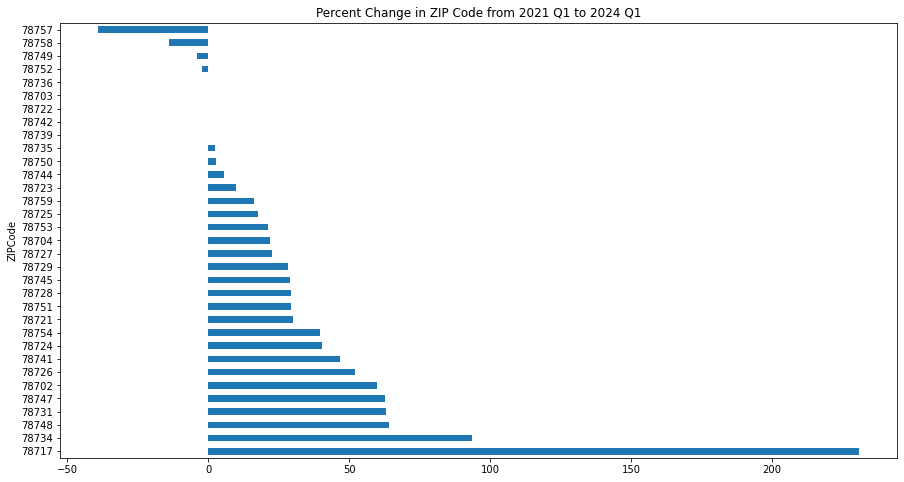

In [102]:
# bar chart of values
plt.figure(figsize=(15,8))

zip_change.plot.barh()
plt.title('Percent Change in ZIP Code from 2021 Q1 to 2024 Q1')
plt.show()

In [103]:
# resort 
last_date = last_date.sort_values(by=0, ascending=False)
first_date = first_date.reindex(last_date.index)

first_date.sort_index()

Reporting_Date          0
ZIPCode                          
78702       2021-01-31  24.000000
78703       2021-01-31   2.500000
78704       2021-01-31  21.333333
78717       2021-01-31   4.333333
78721       2021-01-31  19.000000
78722       2021-01-31   2.500000
78723       2021-01-31  37.666667
78724       2021-01-31  47.333333
78725       2021-01-31  13.333333
78726       2021-01-31  16.000000
78727       2021-01-31  17.666667
78728       2021-01-31  50.333333
78729       2021-01-31  15.333333
78731       2021-01-31   4.500000
78734       2021-01-31   2.500000
78735       2021-01-31   6.833333
78736       2021-01-31   2.500000
78739       2021-01-31   2.500000
78741       2021-01-31  28.666667
78742       2021-01-31   2.500000
78744       2021-01-31  59.000000
78745       2021-01-31  36.666667
78747       2021-01-31  18.666667
78748       2021-01-31  32.333333
78749       2021-01-31   8.500000
78750       2021-01-31  11.666667
78751       2021-01-31   4.000000
78752       2021-01-31  14.000000
78753       2021-01-31  68.000000
78754       2021-01-31  27.000000
78757       2021-01-31   7.666667
78758       2021-01-31  38.000000
78759       2021-01-31  12.333333

In [104]:
last_date

Reporting_Date          0
ZIPCode                          
78753       2024-03-31  82.333333
78724       2024-03-31  66.333333
78728       2024-03-31  65.000000
78744       2024-03-31  62.333333
78748       2024-03-31  53.000000
78745       2024-03-31  47.333333
78741       2024-03-31  42.000000
78723       2024-03-31  41.333333
78702       2024-03-31  38.333333
78754       2024-03-31  37.666667
78758       2024-03-31  32.666667
78747       2024-03-31  30.333333
78704       2024-03-31  26.000000
78721       2024-03-31  24.666667
78726       2024-03-31  24.333333
78727       2024-03-31  21.666667
78729       2024-03-31  19.666667
78725       2024-03-31  15.666667
78759       2024-03-31  14.333333
78717       2024-03-31  14.333333
78752       2024-03-31  13.666667
78750       2024-03-31  12.000000
78749       2024-03-31   8.166667
78731       2024-03-31   7.333333
78735       2024-03-31   7.000000
78751       2024-03-31   5.166667
78734       2024-03-31   4.833333
78757       2024-03-31   4.666667
78742       2024-03-31   2.500000
78739       2024-03-31   2.500000
78703       2024-03-31   2.500000
78722       2024-03-31   2.500000
78736       2024-03-31   2.500000

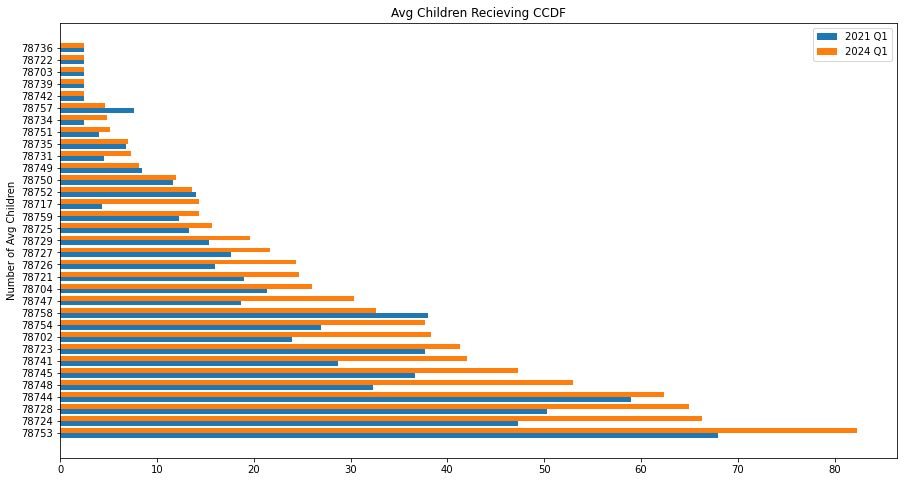

In [105]:
X_axis = np.arange(len(first_date)) 

plt.figure(figsize=(15,8))
plt.barh(X_axis - 0.2, first_date[0].values, 0.4, label = '2021 Q1') 
plt.barh(X_axis + 0.2, last_date[0].values, 0.4, label = '2024 Q1') 

# todo sort
plt.yticks(X_axis, first_date.index)
plt.ylabel("Number of Avg Children") 
plt.title("Avg Children Recieving CCDF") 
plt.legend()
plt.show()

Before formulating some intermediate hypotheses, let's see how Greater Austin YMCA ZIP codes influence the data (child care costs go up or down with the presence of YMCA, or is there too little data to tell, or is there simply no correlation).

In [106]:
# credit to GPT
ymca_zip_codes = [
    78702,  
    78723,  
    78726, 
    78731,
    78735,  
    78748, 
    78758,
    78750, 
    78610 
]

ymca = est_zip[est_zip["ZIPCode"].isin(ymca_zip_codes)]

ymca.shape

(312, 10)

In [107]:
not_ymca = est_zip[~est_zip["ZIPCode"].isin(ymca_zip_codes)]

not_ymca.shape

(975, 10)

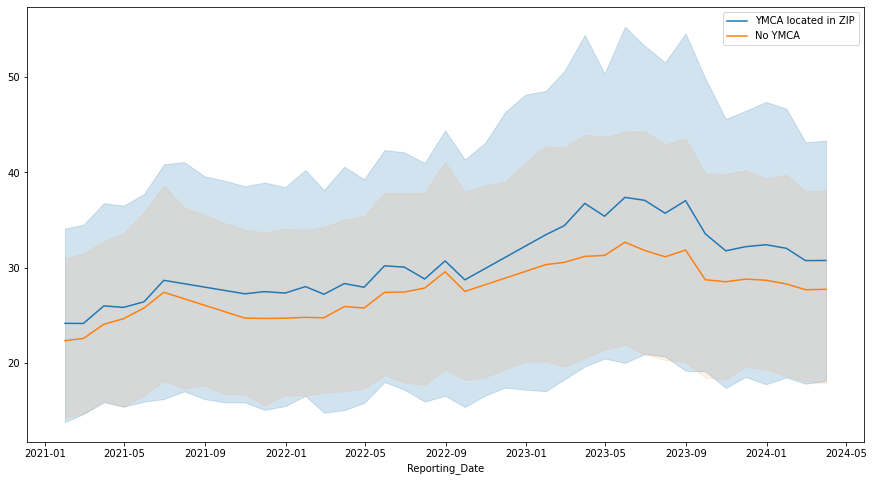

In [108]:
ymca_means = ymca.drop(columns="ZIPCode").mean(axis=1)
not_means = not_ymca.drop(columns="ZIPCode").mean(axis=1)

plt.figure(figsize=(15,8))

sns.lineplot(x=ymca_means.index, y=ymca_means)
sns.lineplot(x=not_means.index, y=not_means, err_kws={"alpha":.1})
plt.legend(["YMCA located in ZIP", "No YMCA"])
plt.show()

In [109]:
# get percent change of columns & ZIPs for YMCA dataset

first_row = ymca.groupby(ymca.index).mean().drop(columns="ZIPCode").iloc[0]
last_row = ymca.groupby(ymca.index).mean().drop(columns="ZIPCode").iloc[-1]

# resort 
last_row = last_row.sort_values(ascending=False)
first_row = first_row.reindex(last_row.index)

first_row

ChildEthnicityHispLatino    27.3750
ChildMale                   34.8750
ChildFemale                 29.5000
ChildRaceWhite              31.2500
ChildAgePrek                29.2500
ChildRaceBlackAfriAmer      27.1250
ChildAgeSchAge              15.5625
ChildAgeInfantToddler       19.3125
ChildRaceMult                3.1250
Name: 2021-01-31 00:00:00, dtype: float64

In [110]:
last_row

ChildEthnicityHispLatino    43.2500
ChildMale                   41.2500
ChildFemale                 39.6250
ChildRaceWhite              35.7500
ChildAgePrek                34.0000
ChildRaceBlackAfriAmer      31.3750
ChildAgeSchAge              25.3750
ChildAgeInfantToddler       21.6250
ChildRaceMult                4.5625
Name: 2024-03-31 00:00:00, dtype: float64

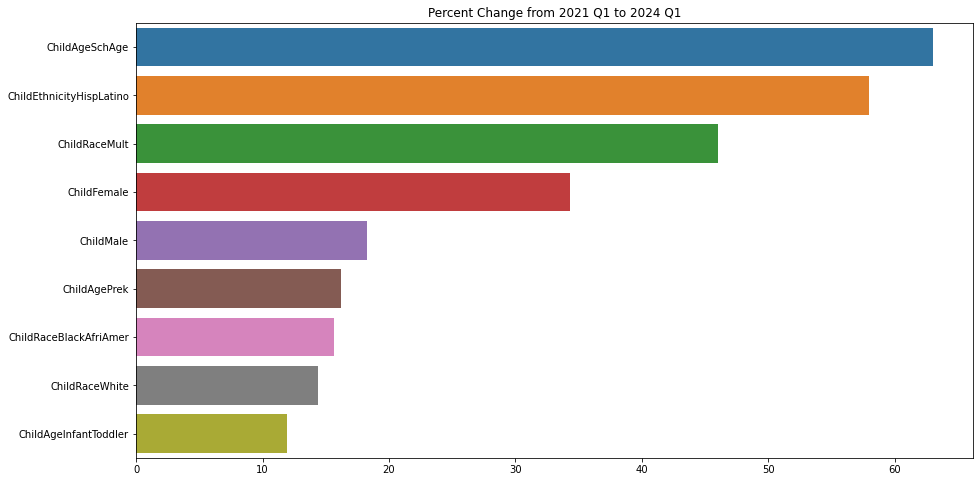

In [111]:
perc_change = ((last_row - first_row)/first_row * 100).sort_values(ascending=False)

# bar chart of values
plt.figure(figsize=(15,8))

sns.barplot(x=perc_change.values, y=perc_change.index, orient = 'h')
plt.title('Percent Change from 2021 Q1 to 2024 Q1')
plt.show()

You know what would be interesting to explore, the movement of infant to prek to childschool age across the years. Especially in YMCA ZIP Codes.

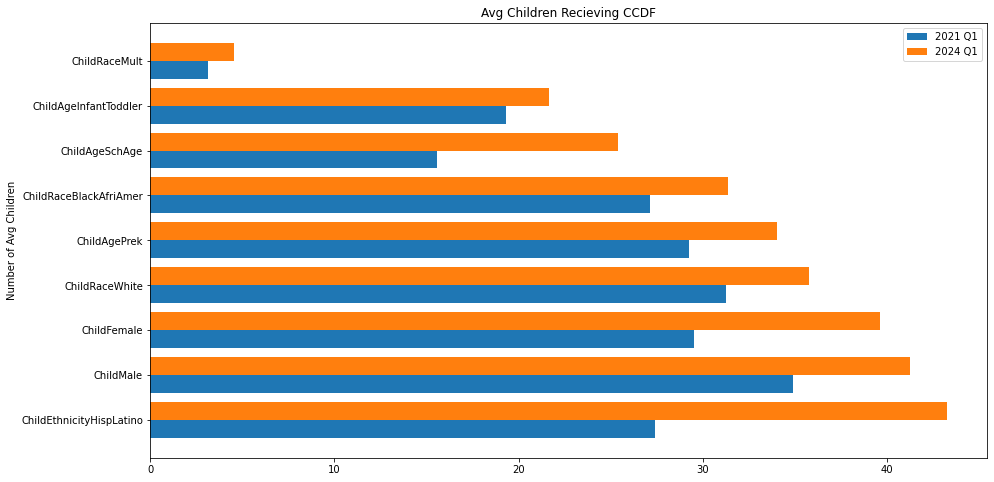

In [112]:
X_axis = np.arange(len(first_row)) 

plt.figure(figsize=(15,8))
plt.barh(X_axis - 0.2, first_row, 0.4, label = '2021 Q1') 
plt.barh(X_axis + 0.2, last_row, 0.4, label = '2024 Q1') 

plt.yticks(X_axis, first_row.index)
plt.ylabel("Number of Avg Children") 
plt.title("Avg Children Recieving CCDF") 
plt.legend()
plt.show()

In [113]:
# get avg change according to zip code 
avg_zip = ymca.set_index(["ZIPCode", ymca.index]).mean(axis=1).reset_index()

avg_zip

ZIPCode Reporting_Date          0
0      78702     2021-01-31  26.111111
1      78702     2021-02-28  24.666667
2      78702     2021-03-31  26.277778
3      78702     2021-04-30  27.833333
4      78702     2021-05-31  30.388889
..       ...            ...        ...
307    78758     2023-11-30  43.666667
308    78758     2023-12-31  44.777778
309    78758     2024-01-31  37.611111
310    78758     2024-02-29  36.055556
311    78758     2024-03-31  36.500000

[312 rows x 3 columns]

In [114]:
# compare percent difference between first date and last date for zip code
first_date = avg_zip[avg_zip["Reporting_Date"] == "2021-01-31"].set_index("ZIPCode")
last_date = avg_zip[avg_zip["Reporting_Date"] == "2024-03-31"].set_index("ZIPCode")

zip_change = ((last_date[0] - first_date[0])/first_date[0] * 100).sort_values(ascending=False)
zip_change

ZIPCode
78702    67.021277
78748    63.609898
78726    59.609121
78731    54.901961
78723    10.276680
78750     2.643172
78735    -2.027027
78758   -15.552699
Name: 0, dtype: float64

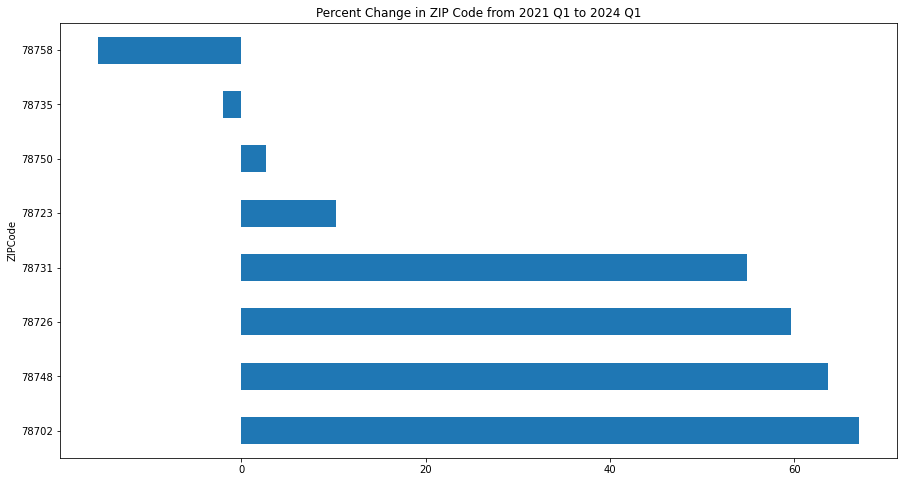

In [115]:
# bar chart of values
plt.figure(figsize=(15,8))

zip_change.plot.barh()
plt.title('Percent Change in ZIP Code from 2021 Q1 to 2024 Q1')
plt.show()

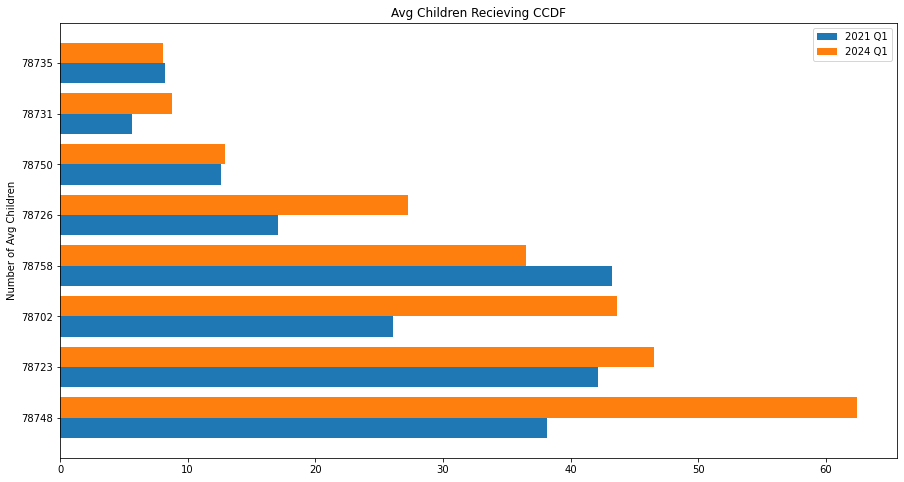

In [116]:
# resort 
last_date = last_date.sort_values(by=0, ascending=False)
first_date = first_date.reindex(last_date.index)

X_axis = np.arange(len(first_date)) 

plt.figure(figsize=(15,8))
plt.barh(X_axis - 0.2, first_date[0].values, 0.4, label = '2021 Q1') 
plt.barh(X_axis + 0.2, last_date[0].values, 0.4, label = '2024 Q1') 

# todo sort
plt.yticks(X_axis, first_date.index)
plt.ylabel("Number of Avg Children") 
plt.title("Avg Children Recieving CCDF") 
plt.legend()
plt.show()

## Year Over Year Change in Children in Families Needing Childcare (Infant, Prek, SchoolAge) in YMCA ZIPs 

Will do for all ZIPS afterwards too.

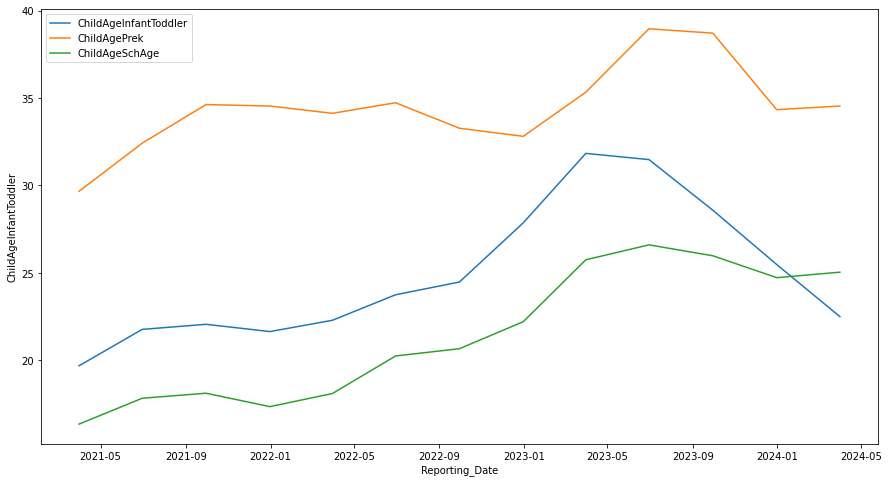

In [117]:
children = ymca.resample("Q").mean()[["ChildAgeInfantToddler", "ChildAgePrek", "ChildAgeSchAge"]]

plt.figure(figsize=(15,8))

# line plot for historical trends
sns.lineplot(data=children, x=children.index, y=children.ChildAgeInfantToddler)
sns.lineplot(data=children, x=children.index, y=children.ChildAgePrek)
sns.lineplot(data=children, x=children.index, y=children.ChildAgeSchAge)

plt.legend(["ChildAgeInfantToddler", "ChildAgePrek", "ChildAgeSchAge"])

plt.show()

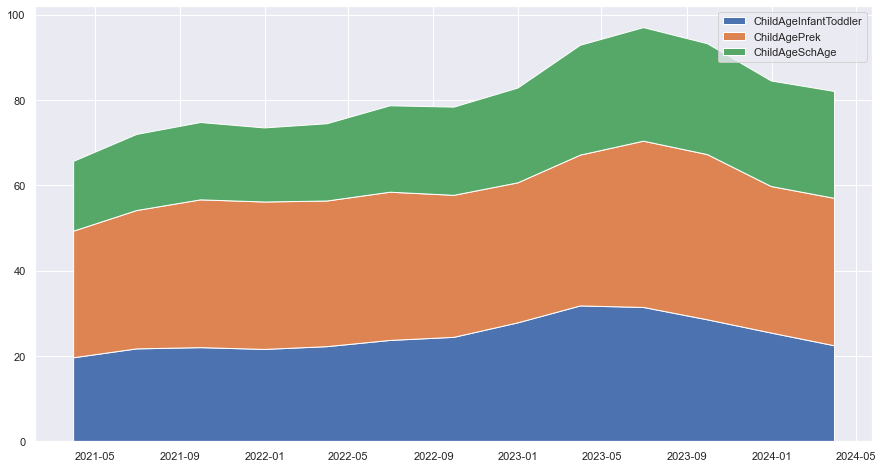

In [118]:
# stacked area chart
plt.figure(figsize=(15,8))
sns.set_theme() 

plt.stackplot(children.index, children.ChildAgeInfantToddler, children.ChildAgePrek, children.ChildAgeSchAge)
plt.legend(labels=['ChildAgeInfantToddler', 'ChildAgePrek', "ChildAgeSchAge"])

plt.show()

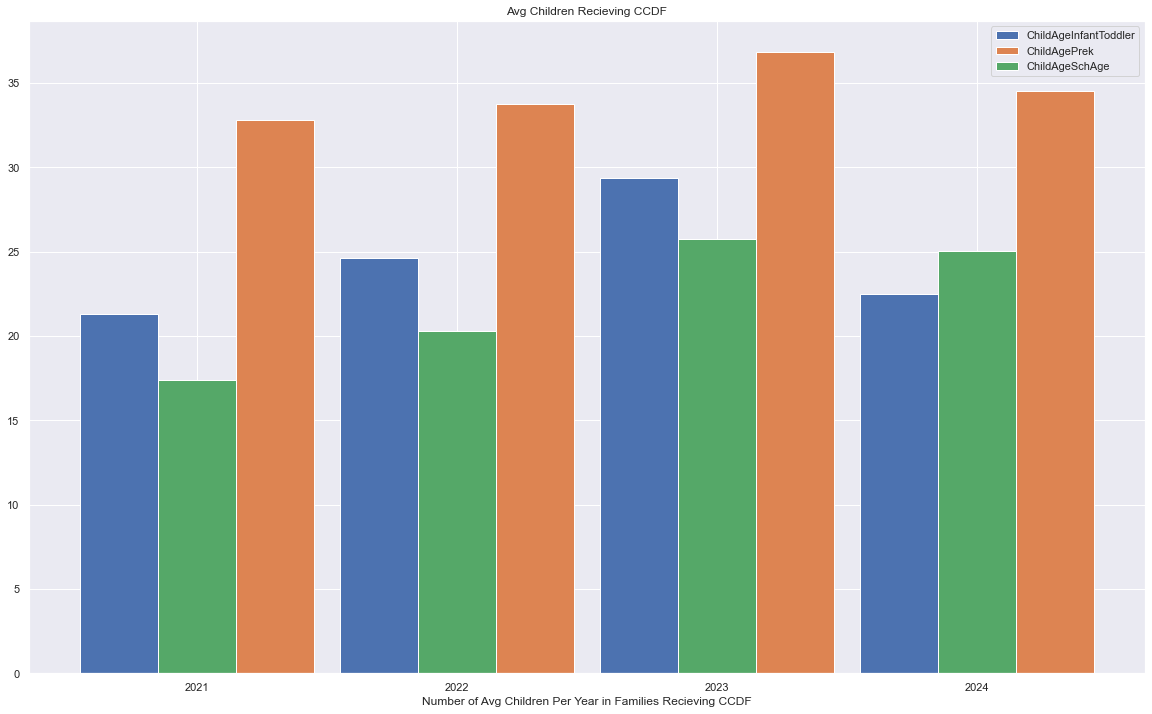

In [119]:
# bar chart
years = children.resample("1Y").mean()

X_axis = np.arange(len(years)) 

plt.figure(figsize=(20,12))
sns.set_theme() 

plt.bar(X_axis - 0.3, years.ChildAgeInfantToddler, 0.3, label = 'ChildAgeInfantToddler') 
plt.bar(X_axis + 0.3, years.ChildAgePrek, 0.3, label = 'ChildAgePrek') 
plt.bar(X_axis, years.ChildAgeSchAge, 0.3, label = 'ChildAgeSchAge')

# todo sort
plt.xticks(X_axis, years.index.year)
plt.xlabel("Number of Avg Children Per Year in Families Recieving CCDF") 
plt.title("Avg Children Recieving CCDF") 
plt.legend()
plt.show()

## Non-YMCA ZIPs Explore

In [120]:
# get percent change of columns & ZIPs for non-YMCA dataset

first_row = not_ymca.groupby(not_ymca.index).mean().drop(columns="ZIPCode").iloc[0]
last_row = not_ymca.groupby(not_ymca.index).mean().drop(columns="ZIPCode").iloc[-1]

# resort 
last_row = last_row.sort_values(ascending=False)
first_row = first_row.reindex(last_row.index)

first_row

ChildFemale                 28.92
ChildEthnicityHispLatino    29.26
ChildMale                   28.74
ChildRaceWhite              28.30
ChildAgePrek                25.66
ChildRaceBlackAfriAmer      23.78
ChildAgeInfantToddler       17.02
ChildAgeSchAge              15.90
ChildRaceMult                3.44
Name: 2021-01-31 00:00:00, dtype: float64

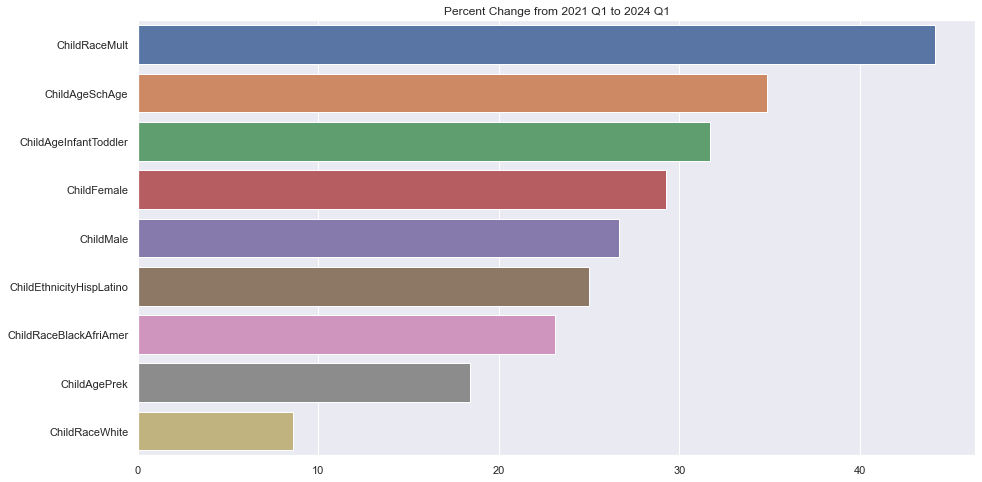

In [121]:
perc_change = ((last_row - first_row)/first_row * 100).sort_values(ascending=False)

# bar chart of values
plt.figure(figsize=(15,8))

sns.barplot(x=perc_change.values, y=perc_change.index, orient = 'h')
plt.title('Percent Change from 2021 Q1 to 2024 Q1')
plt.show()

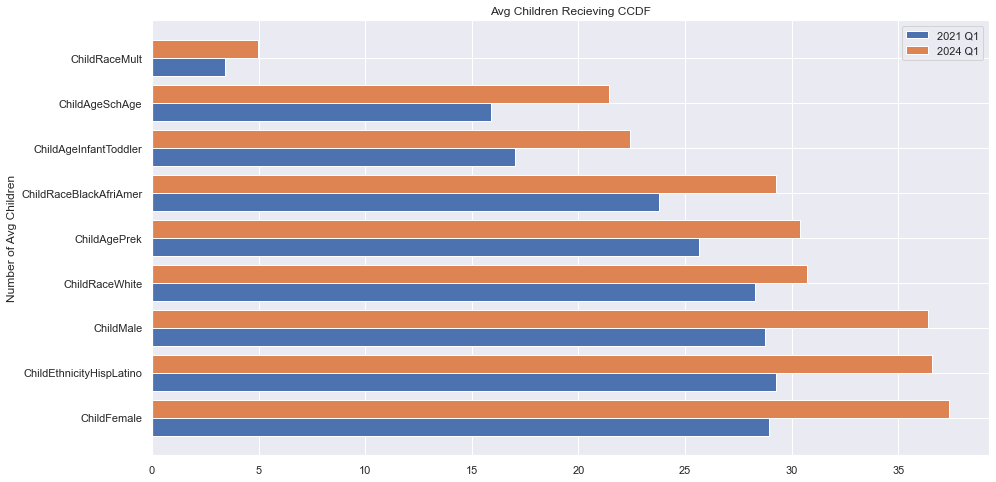

In [122]:
X_axis = np.arange(len(first_row)) 

plt.figure(figsize=(15,8))
plt.barh(X_axis - 0.2, first_row, 0.4, label = '2021 Q1') 
plt.barh(X_axis + 0.2, last_row, 0.4, label = '2024 Q1') 

plt.yticks(X_axis, first_row.index)
plt.ylabel("Number of Avg Children") 
plt.title("Avg Children Recieving CCDF") 
plt.legend()
plt.show()

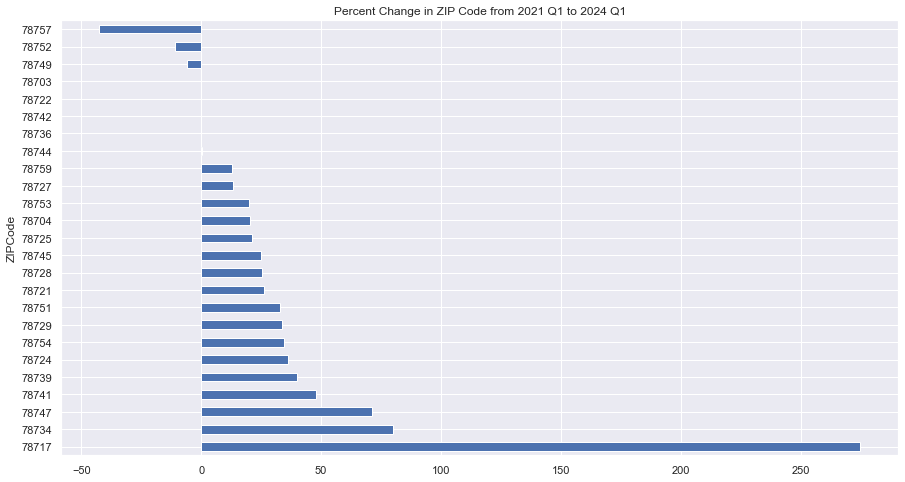

In [123]:
# get avg change according to zip code 
avg_zip = not_ymca.set_index(["ZIPCode", not_ymca.index]).mean(axis=1).reset_index()

# compare percent difference between first date and last date for zip code
first_date = avg_zip[avg_zip["Reporting_Date"] == "2021-01-31"].set_index("ZIPCode")
last_date = avg_zip[avg_zip["Reporting_Date"] == "2024-03-31"].set_index("ZIPCode")

zip_change = ((last_date[0] - first_date[0])/first_date[0] * 100).sort_values(ascending=False)

# bar chart of values
plt.figure(figsize=(15,8))

zip_change.plot.barh()
plt.title('Percent Change in ZIP Code from 2021 Q1 to 2024 Q1')
plt.show()

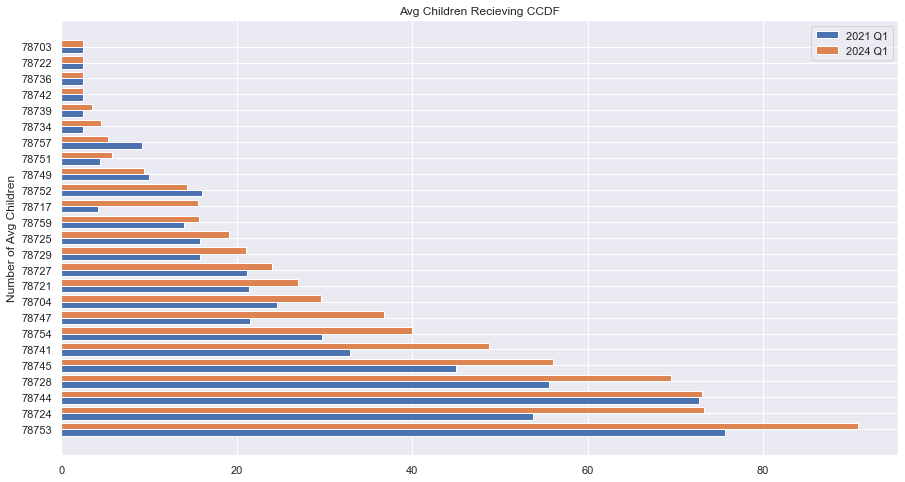

In [124]:
# resort 
last_date = last_date.sort_values(by=0, ascending=False)
first_date = first_date.reindex(last_date.index)

X_axis = np.arange(len(first_date)) 

plt.figure(figsize=(15,8))
plt.barh(X_axis - 0.2, first_date[0].values, 0.4, label = '2021 Q1') 
plt.barh(X_axis + 0.2, last_date[0].values, 0.4, label = '2024 Q1') 

# todo sort
plt.yticks(X_axis, first_date.index)
plt.ylabel("Number of Avg Children") 
plt.title("Avg Children Recieving CCDF") 
plt.legend()
plt.show()

## Year Over Year Change in Children in Families Needing Childcare (Infant, Prek, SchoolAge) in all Zips

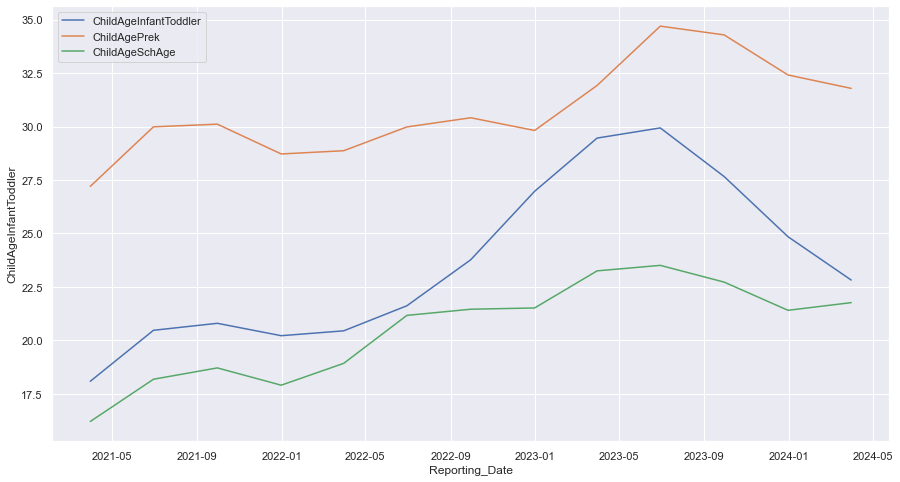

In [125]:
children = est_zip.resample("Q").mean()[["ChildAgeInfantToddler", "ChildAgePrek", "ChildAgeSchAge"]]

plt.figure(figsize=(15,8))

# line plot for historical trends
sns.lineplot(data=children, x=children.index, y=children.ChildAgeInfantToddler)
sns.lineplot(data=children, x=children.index, y=children.ChildAgePrek)
sns.lineplot(data=children, x=children.index, y=children.ChildAgeSchAge)

plt.legend(["ChildAgeInfantToddler", "ChildAgePrek", "ChildAgeSchAge"])

plt.show()

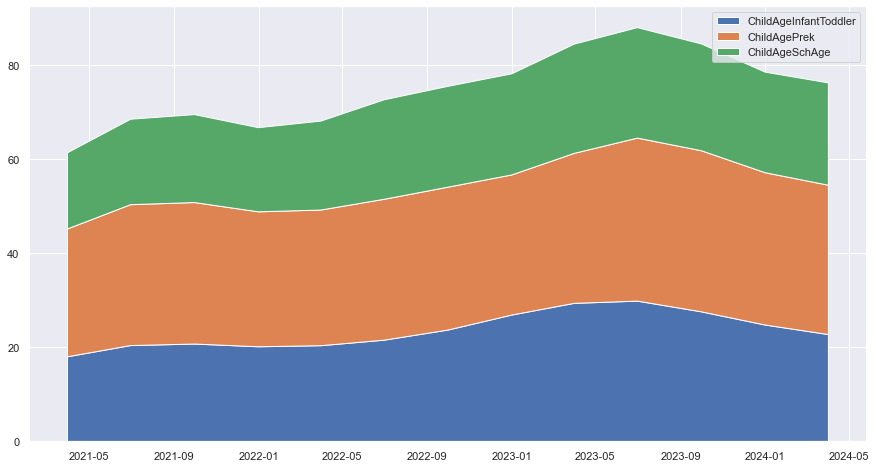

In [126]:
# stacked area chart
plt.figure(figsize=(15,8))
sns.set_theme() 

plt.stackplot(children.index, children.ChildAgeInfantToddler, children.ChildAgePrek, children.ChildAgeSchAge)
plt.legend(labels=['ChildAgeInfantToddler', 'ChildAgePrek', "ChildAgeSchAge"])

plt.show()

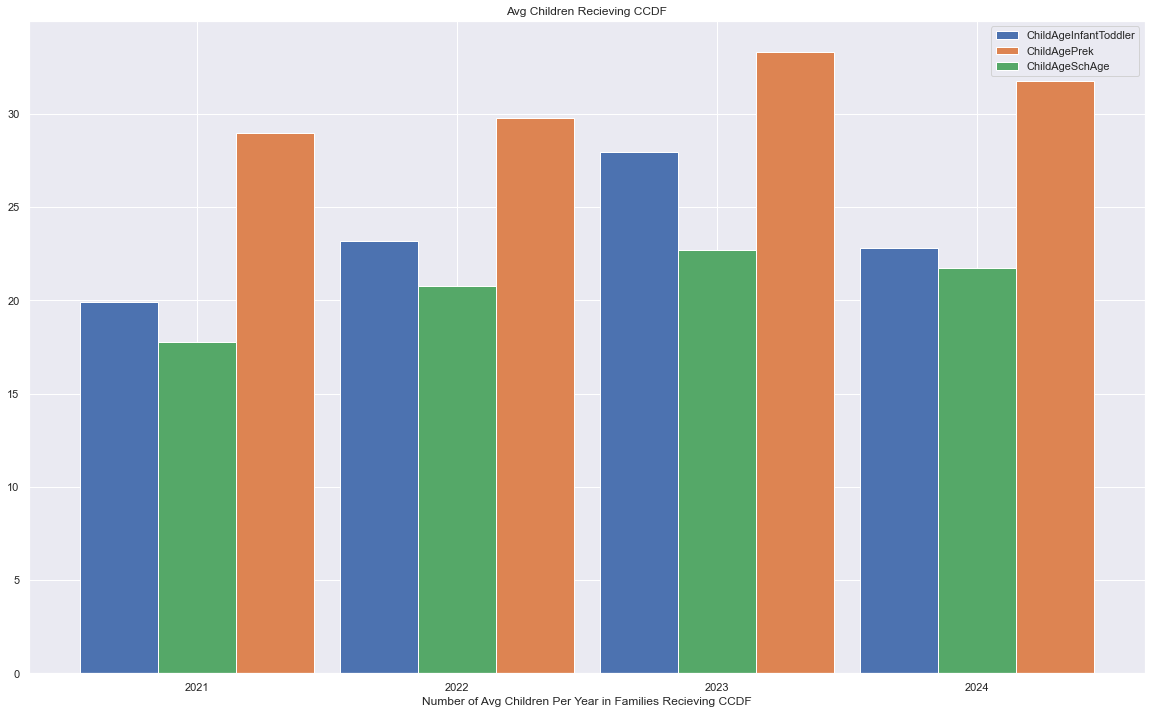

In [127]:
# bar chart
years = children.resample("1Y").mean()

X_axis = np.arange(len(years)) 

plt.figure(figsize=(20,12))
sns.set_theme() 

plt.bar(X_axis - 0.3, years.ChildAgeInfantToddler, 0.3, label = 'ChildAgeInfantToddler') 
plt.bar(X_axis + 0.3, years.ChildAgePrek, 0.3, label = 'ChildAgePrek') 
plt.bar(X_axis, years.ChildAgeSchAge, 0.3, label = 'ChildAgeSchAge')

# todo sort
plt.xticks(X_axis, years.index.year)
plt.xlabel("Number of Avg Children Per Year in Families Recieving CCDF") 
plt.title("Avg Children Recieving CCDF") 
plt.legend()
plt.show()

In [128]:
children[['ChildAgeInfantToddler', 'ChildAgePrek', 'ChildAgeSchAge']].resample("1Y").mean()

ChildAgeInfantToddler  ChildAgePrek  ChildAgeSchAge
Reporting_Date                                                     
2021-12-31                  19.897389     29.003521       17.756159
2022-12-31                  23.203786     29.768169       20.769832
2023-12-31                  27.976010     33.325758       22.724747
2024-12-31                  22.823232     31.782828       21.767677

# Summary

## Purpose

In the United States, child-care is a key factor in the multi-pronged implementation of poverty reduction as (https://www.povertycenter.columbia.edu/child-care-and-paid-family-leave). Furthermore, studies have shown that poverty reduction benefits can even result in improved cognitive skills in the future life of infants who come from families recieving support (https://www.babysfirstyears.com/_files/ugd/88a466_4d32ee6b1b9a43f18f72e0662088ebda.pdf) (Troller-Renfree et al).

In the document, I report the findings of my exploratory analysis of child-care needs in Austin, through the publically available demographic data of children receiving Child Care and Development Fund (CCDF) assistance. 

What is the CCDF?
* "federal and state partnership program (over $5 billion in federal funding) authorized under the Child Care and Development Block Grant Act (CCDBG) and administered by states, territories, and tribes with funding and support from the Administration for Children and Families’ Office of Child Care. States use CCDF to provide financial assistance to low-income families to access child care so they can work or attend a job training or educational program." (https://www.acf.hhs.gov/archive/occ/faq/what-child-care-and-development-fund-ccdf)
* "In addition, states use the CCDF to invest in quality to benefit millions more children by building the skills and qualifications of the teacher workforce, supporting child care programs to achieve higher standards, and providing consumer education to help parents select child care that meets their families’ needs." (https://www.acf.hhs.gov/archive/occ/faq/what-child-care-and-development-fund-ccdf)
* "To be eligible for this benefit program, you must be a parent or primary caregiver responsible for children under the age of 13 years of age, or under 19 if incapable of self-care or under court supervision who needs assistance paying for childcare" (https://www.benefits.gov/benefit/615)

Analyzing this data will provide two-fold gains, as we can:
* get an understanding of the trend of child-care needs according to various demographics in the Greater Austin Area, in comparison to demographic changes in Austin (https://www.austintexas.gov/news/city-austin-releases-new-demographic-story-map-focusing-age-trends-austin), 
* as well begin to get an understanding workforce development in low-income families recieving CCDF

In this report I describe my methodology, risks, solutions, next steps, formulated hypothesis, and subsequent dashboard.  

## Methodology

1. Collected open source data from https://data.texas.gov/ (Monthly Child Care Services Data Report - Children Served by ZIP Code Q1 2021 to Q1 2024)
2. Filtered data town to Greater Austin Area (by ZIP Code)
3. Checked for data quality (missing values according to time, ZIP code, and column, as well as general outliers)
4. Performed exploratory analysis 
5. Created Dashboard

## Data Quality Findings

Within my initial analysis, I discovered the following data quality concerns:
1. 2021 Q3 & 2022 Q4 are duplicates of 2021 Q2 & 2022 Q2 respectively (i.e. these quarters are missing).
2. To protect privacy, `*` symbol is placed to left-censor data where ZIP codes contain < 5 children.
3. ZIP codes have not all been consistently recorded throughout all years (only 33 out of 60 ZIP codes have been recorded each year)
4. Demographic columns (`ChildRaceAsian`, `ChildDisability`, `ChildRaceAmIndAlaNat`) contain >80% censored data.

## Risks & Considerations of Data Quality Concerns

1. Duplicate data inflates values for Q3 2021 & Q4 2022. 
2. Each month entails at least 50% censored data, 
3. Inconsistent data recording introduces invalid findings (one year might have more numbers simply due to expanded data collection)
4. Miniscule sample size of current data is insufficient to generalize on other columns


## Solutions

Below I detail each solution I implemented to resolve the above concerns:
1. Removed duplicated data, reached out to the dataset owner on this concern, and linearly imputed missing data using present values.
2. Replaced censored data with a constant of `2.5`. Below details the percent of demographic data imputed

```
ChildEthnicityHispLatino    0.337235
ChildRaceAmIndAlaNat        0.989027
ChildRaceAsian              0.994148
ChildRaceBlackAfriAmer      0.371617
ChildRaceHawaiiPacific      1.000000
ChildRaceWhite              0.334309
ChildRaceMult               0.719824
ChildMale                   0.305048
ChildFemale                 0.354060
ChildDisability             0.907827
ChildAgeInfantToddler       0.386979
ChildAgePrek                0.341624
ChildAgeSchAge              0.408925
```

3. Removed all but 33 consistent ZIP codes from data.
4. Remove demographic columns (`ChildRaceAsian`, `ChildDisability`, `ChildRaceAmIndAlaNat`) containing > 80% imputed data.

While these solutions do resolve the present risk of missing data, they also could introduce inaccurate bias into the analysis. For example the usage of `2.5` implies a normal distribution of censored data. However this data could entail a different distribution and could furthermore be "zero inflated." Furthermore, these columns are not *mutually exclusive*, that is there is most likely a large overlap between categories, especially between overarching categories (Gender & Race, Gender & Ethnicity, etc).

Additionally, as overlap exists amongst demographics (multiple demographic labels can apply to the same child), I strictly use the age demographics (`ChildInfantToddler`, `ChildAgePrek`, `ChildAgeSchAge`) when calculating averages.

## Discovered Hypothesis

After completing these data transformations, I performed an exploratory data analysis and discovered the following nuanced insights. A quick summary is located below:

* Overall, the number of children recieving CCDF assistance is trending upwards from Q1 2021 to Q1 2024.
    * All demographics have experienced an increase during this time period, with no clear indicator as to which demographic is leading this increase. The demographics experiencing the largest increases (across the categories of ethnicity, gender, and age) are `ChildEthnicityHispLatino`, `ChildFemale`, and `ChildAgeSchAge`.
* However, a notable decrease occured from Q3 2023 to Q1 2024.
    * All demographics have experienced a decrease during this time period, with no clear indicator as to which demographic is leading this decrease (due to shared categories). The demographics experiencing the largest decreases (across the categories of ethnicity, gender, and age) are `ChildRaceBlackAfriAmer`, `ChildMale`, and `ChildInfantToddler`.
* Initial time series models signal a decrease in children recieving assistance in 2024.
* Across all recorded years, pre-kindergarten aged children account for the majority of children in families recieving assistance.
* The majority of ZIP codes in Austin have experienced an overall increase in children recieving assistance, with a select few ZIP codes experiencing the largest of differences.

More detail is given under each respective section.

### Positive Overall Trend 
The number of children recieving CCDF assistance is trending upwards, with the beginning of Q1 2021 showing an average of 19.97 children per ZIP code and the end of Q1 2024 concluding with an average of 25.29 children per ZIP code (26.62% change).

All demographics have experienced an increase in average quantity from January 2021 to March 2024, with children in the `ChildEthnicityHispanicLatino` demographic experiencing the **largest** increase between January 2021 & March 2024. In January 2021, there was an average of 28.80 children across all ZIP codes in the `ChildEthnicityHispanicLatino` demographic. By March 2024, this amount increased to 38.20 (32.61%). 

Furthermore all demographics experienced an increase during this time period, averaging a 27.68% change. In the gender category, `ChildFemale` increased the most, going from 29.06 in 2021 to 37.92 in 2024 (30.50%). In the age category, `ChildAgeSchAge`increased the most from 15.81 in 2021 to 22.39 in 2024 (41.57%).

### Apparent Decrease from Q3 2023 to Q1 2024
There has also been a notable decline in children receiving CCDF assistance from August 2023 to March 2024 which does not follow seasonal trend. In August 2023 an average of 29.39 children per ZIP code were recieving assistance, which decreased to 25.29 by March 2024 (-13.95%).

Limiting our scope to the age demographic, `ChildInfantToddler` experienced the most notable decrease in the age category. In August 2023, there was an average of 27.6 children in the `ChildInfantToddler` category. By March 2024, this number decreased to 22.2 (-19.7%). A demographic shift could possibly explain this drop in values during this time period, but then an increase in the `ChildAgePreK` column should be expected as well. However, this is not the case, as both the `ChildAgePreK` and `ChildAgeSchAge` demographic decreased by 12.17% and 10.09% respecitvely. 

Furthermore all demographics experienced a decrease during this time period, averaging a -14.59% change. In the gender category, `ChildMale` decreased the most, going from 44.36 in 2023 to 37.57 in 2024 (-15.30%). In the race category, `ChildRaceBlackAfriAmer` decreased the most from 35.18 in 2023 to 22.39 in 2024 (-15.33%).

### Modeling Future Outcomes
To model future values in this dataset, I choose an ARIMA model to account for non-stationarity in the dataset. Using this model we can observe that the trend for average children is predicted to decrease to an average of 22.47 by December 2024. 
    * However, for better granularity, this regression analysis should be applied to each respective ZIP code, as opposed to overall average. 

### Pre-Kindergarten Aged Children Account for Largest Share of Age Demographics
Year over year, the average number of children across all ZIP codes in the `ChildAgePreK` demographic is larger the other 2 age demographics (`ChildInfantToddler`, `ChildAgeSchAge`)
    * 2021: ChildAgePrek(29.00), ChildAgeInfantToddler(19.90), ChildAgeSchAge(17.76)
    * 2022: ChildAgePrek(29.77), ChildAgeInfantToddler(23.20), ChildAgeSchAge(20.77)
    * 2023: ChildAgePrek(33.33), ChildAgeInfantToddler(27.98), ChildAgeSchAge(22.72)
    * 2024: ChildAgePrek(31.78), ChildAgeInfantToddler(21.77), ChildAgeSchAge(22.82)

### Notable ZIP Codes with Positive Trend
When only considering the quantity of children across age demographics, 72% of Austin ZIP codes have experienced an increase in children recieving CCDF assistance from January 2021 to March 2024, 16% of ZIP codes have experienced no change, and finally, 12% of ZIP codes have experienced a decrease. The most notable changes in ZIP codes include:
    * 78748 (Manchaca): 32.33 in 2021 to 53 in 2024
    * 78724 (Daffin): 47.33 in 2021 to 66.33 in 2024
    * 78728 (Wells Branch): 50.33 in 2021 to 65 in 2024

## Prescriptions

* Ensure Spanish language support for children within the `ChildEthnicityHispanicLatino` demographic within the YMCA child-care centers, as need for child-care increases.
* Target outreach to families with children that are within the `ChildRaceBlackAfriAmer` and `ChildInfantToddler` demographics to identify cause in decrease.
*  Anticipate consistent need from 2023 into 2024 for child-care for children in the `ChildAgeSchAge` category, with a potential reduced need for `ChildInfantToddler`category.
* Enhance Pre-K child-care programs for 2024, as children in the `ChildAgePreK` demographic consistently make up the largest share of those recieving assistance according to age. 
* Investigate and tailor outreach for child-care needs in key ZIP codes of 78748, 78724, and 78728. Analyze which demographic shifts account for largest changes in these ZIP codes.

## Data Story (Narrative & Dashboard)

Overall Increase, highlighting demographics
However recent decrease, highlighting demographics
Heat map across ZIP code, highlighting largest increases 

## Next Steps

* Investigate underlying causes of decrease of children receiving CCDF from 2023 to 2024, through statistical methods as well as policy, economic, and demographic research.
* Receive data from missing quarters.
* Investigate demographic distributions to better model censored data.
* Investigate individual ZIP Code demographics to better understand trend and target outreach.
* Monitor additional data to compare predicted trends with reality.
* Combine child data with family data to understand workforce and educational needs of family.
* Create a data dashboard to better communicate findings 